# Consigna

**PARTE A - Transformación de Datos**

Elige cuáles de las siguientes tareas son apropiadas para su dataset. Implementa las transformaciones que elegiste. Es importante que justifiques por qué las haces:

1.Detección y eliminación de Outliers

1.Encoding

1.Imputación de valores faltantes

1.Escalado de datos

1.Generación de nuevas variables predictoras/reducción de dimensionalidad (SVD/PCA).

Vuelve a entrenar el modelo implementado en la Entrega 01 - en particular, el árbol de decisión - con este nuevo dataset transformado. Evalúa su desempeño a partir del dataset obtenido luego de transformar los datos. ¿Hay una mejora en su desempeño? Compara con el desempeño obtenido en el proyecto 01. Sea cual sea la respuesta, intenta explicar a qué se debe.



In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
#Importar datos
#data = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')
properati_ds = pd.read_csv('D:/DS4A/Acamica/DS Acamica/wk-01/DS_Proyecto_01_Datos_Properati.csv')


In [57]:
#Imprimir las primeras 5 instancias
properati_ds.head()

start_date    end_date  created_on        lat        lon         l1  \
0  2019-10-17  2019-12-23  2019-10-17 -34.605880 -58.384949  Argentina   
1  2019-10-17  2019-11-21  2019-10-17 -34.624056 -58.412110  Argentina   
2  2019-10-17  2019-11-01  2019-10-17 -34.593569 -58.427474  Argentina   
3  2019-10-17  2019-12-23  2019-10-17 -34.581294 -58.436754  Argentina   
4  2019-10-17  2020-03-11  2019-10-17 -34.914194 -57.938219  Argentina   

                       l2             l3  rooms  bedrooms  bathrooms  \
0         Capital Federal  San Cristobal    7.0       7.0        2.0   
1         Capital Federal          Boedo    2.0       1.0        2.0   
2         Capital Federal        Palermo    2.0       1.0        1.0   
3         Capital Federal        Palermo    2.0       1.0        1.0   
4  Bs.As. G.B.A. Zona Sur       La Plata    2.0       1.0        1.0   

   surface_total  surface_covered     price currency  \
0          140.0            140.0  153000.0      USD   
1           70.0             58.0  159000.0      USD   
2           45.0             45.0  125000.0      USD   
3           85.0             50.0  295000.0      USD   
4           50.0             35.0   40000.0      USD   

                                               title  \
0        ***Venta semipiso centro, ideal hostel*****   
1   Espectacular PH reciclado en Boedo sin expensas.   
2  Depto.tipo casa de 2 ambientes en Venta en Pal...   
3  COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...   
4  58 entre 1 y 2  Venta de departamento en ph.1 ...   

                                         description property_type  \
0  DESCRIPCION DE LA PROPIEDAD: Departamento de 1...  Departamento   
1   PH reciclado en Boedo a una cuadra de la plaz...            PH   
2  2 ambienets amplio , excelente estado , patio ...            PH   
3  HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...            PH   
4  58 entre 1 y 2  Venta de departamento en PH. P...            PH   

  operation_type  
0          Venta  
1          Venta  
2          Venta  
3          Venta  
4          Venta

En esta parte de ingeniería de Atributos, se seleccionarán algunos que a criterio del DS son relevantes. En el primer Sprint, fué posible identificar atributos significativos que no aportaban información predictora. En este caso las fechas de inicio, terminación y creación "start_date","end_date","created_on"; de cada entrada no son relevantes para generar un modelo de predicción de precios generalista. De la misma forma la ubicación geográfica (Lat, Lon). Otro grupo de atributos a consideración para ser limpiados corresponde a aquellos triviales como la moneda (que para todos los registros es USD), la ubicación de país (l1) que para todos es Argentina. Finalmente atributos compuestos por texto descriptivo podrá requerir herramientas de análisis de lenguaje avanzado, que están por fuera del alcance del actual ejercicio. Siendo así, se presenta a continuación el código para selección de atributos significantes:

In [58]:
#Código para eliminar atributos no relevantes para crear un modelo de predicción generalista
eliminar = ["start_date","end_date","created_on","lat","lon","l1","currency","title","description","operation_type"]
datos_limpios = properati_ds.drop(eliminar, axis=1)
datos_limpios.head()

l2             l3  rooms  bedrooms  bathrooms  \
0         Capital Federal  San Cristobal    7.0       7.0        2.0   
1         Capital Federal          Boedo    2.0       1.0        2.0   
2         Capital Federal        Palermo    2.0       1.0        1.0   
3         Capital Federal        Palermo    2.0       1.0        1.0   
4  Bs.As. G.B.A. Zona Sur       La Plata    2.0       1.0        1.0   

   surface_total  surface_covered     price property_type  
0          140.0            140.0  153000.0  Departamento  
1           70.0             58.0  159000.0            PH  
2           45.0             45.0  125000.0            PH  
3           85.0             50.0  295000.0            PH  
4           50.0             35.0   40000.0            PH

In [59]:
#Código para indagar la dimensión de la nueva DV
print("La base de datos tiene %d filas y %d columnas"%(datos_limpios.shape[0],datos_limpios.shape[1]))

La base de datos tiene 146660 filas y 9 columnas


In [60]:
#Mostrar las características principales de los datos en columnas
print("Columnas incluidas:")
print(datos_limpios.columns)
print("----------------")
print("# de datos faltantes por columna")
print(datos_limpios.isna().sum())
print("----------------")
print("Datos faltantes por columna (%)")
print(round((datos_limpios.isna().sum() * 100/ len(datos_limpios)),2).sort_values(ascending=False))
print("----------------")
print("Tipos de dato por columna")
print(datos_limpios.dtypes)

Columnas incluidas:
Index(['l2', 'l3', 'rooms', 'bedrooms', 'bathrooms', 'surface_total',
       'surface_covered', 'price', 'property_type'],
      dtype='object')
----------------
# de datos faltantes por columna
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
property_type          0
dtype: int64
----------------
Datos faltantes por columna (%)
surface_covered    14.74
surface_total      14.00
bathrooms           4.06
l2                  0.00
l3                  0.00
rooms               0.00
bedrooms            0.00
price               0.00
property_type       0.00
dtype: float64
----------------
Tipos de dato por columna
l2                  object
l3                  object
rooms              float64
bedrooms           float64
bathrooms          float64
surface_total      float64
surface_covered    float64
price              float64

In [8]:
#Se evidencian tres columnas con datos faltantes: Surface_covered con el 14.74% de datos faltantes, surface_total con el 14% y bathrooms con el 4.06%
#Nótese que la proporción de datos faltantes en las columnas de area total y cubierta es muy similar, comportamiento explicado por la alta correlación de estos dos
#atributos (0.91) derivado del análisis del trabajo anterior. Respecto al tipo de dato faltante, puede atribuirse al MCAR o MAR; pués este atributo
# es esencial para determinar el precio de una propiedad, la relación área versus precio es directamente propoporcionl; por lo que no tiene sentido
#que de manera deliverada este valor sea omitido por  quien haya registrado los proyectos en la base de datos inmobiliaria

In [9]:
# DETECTAR Y FILTRAR OUTLIERS
#En este segmento se realizarán análisis para detectar datos atípicos o outliers. Se analizará la disperción del atributo precio en
# relación a los tipos de propiedad

C:\Users\alexander.valencia\Anaconda3\envs\geo_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

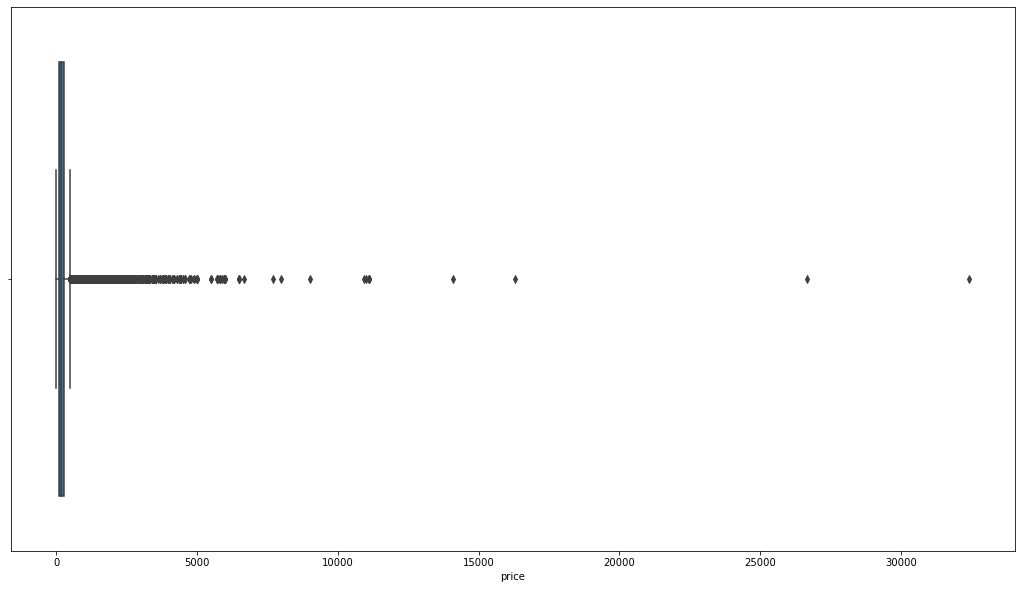

In [61]:
#Grafica para visualizar la dispersión en el atributo precio:
plt.figure(figsize=(18,10))
precio = datos_limpios.price/1000
sns.boxplot(precio)

In [ ]:
#De manera visual se pueden identifcar dos o tres agrupaciones, la primera con una cantidad importante de datos en el rango de precio inferior a los 
#USD 5.000.000, otro segmento entre 5 y 10 millones de dólares, y otros outliers muy por encima de estos valores.
#En este punto es relevante revisar si el precio obedece a una distribución simétrica

C:\Users\alexander.valencia\Anaconda3\envs\geo_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

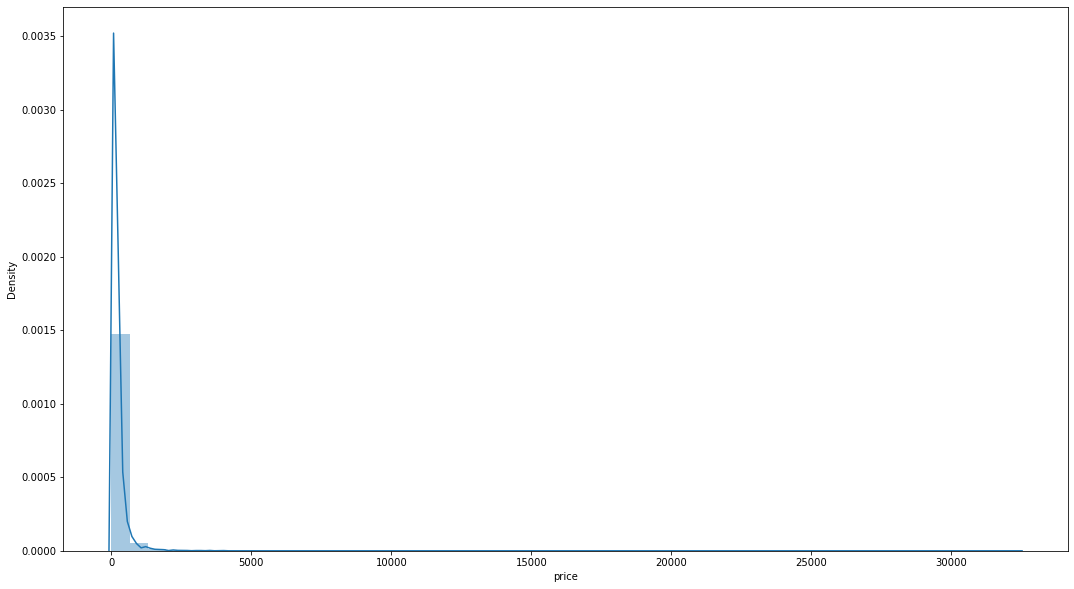

In [62]:
#Grafica de la la distribución de los precios
plt.figure(figsize=(18,10))
sns.distplot(precio, kde = 1)

In [ ]:
#Nótese que existe una fuerte asimetría hacia valores superiores de precio, (asimetría a la derecha), un análisis estadístico rápido muestra lo sgte: 

In [63]:
datos_limpios["price"].describe()

count    1.466600e+05
mean     2.412211e+05
std      3.185195e+05
min      5.500000e+03
25%      1.110000e+05
50%      1.660000e+05
75%      2.650000e+05
max      3.243423e+07
Name: price, dtype: float64

In [ ]:
# Se evidencia un promedio de  241.000USD/propiedad, una desviación estándar de 318.000 usd/propiedad, el 75%  de los datos está por debajo de 1 desviación estándar
# y el dato más alto está a más de 10 desviaciones estándar del medio, obviamente es necesario limpiar estos outliers, pero antes es 
#interesante analizar el análisis por categoría de propiedad

<AxesSubplot:xlabel='property_type', ylabel='price'>

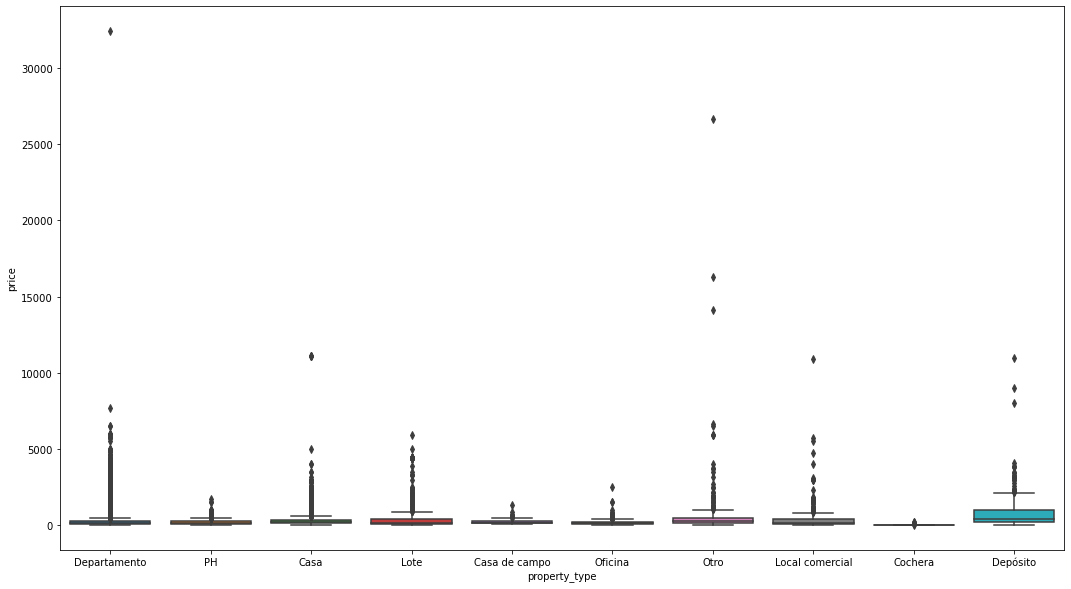

In [64]:
#Graficar distribución del precio por tipo de propiedad, diagrama de caja y bigotes:
plt.figure(figsize=(18,10))
precio = datos_limpios.price/1000
sns.boxplot(y = precio, x = datos_limpios.property_type)

In [13]:
#Se evidencian dos tipo de propiedad que incluyen los outliers más extremos: "Departamento" y "otros".
#A continuación se realizará el proceso de eliminación de extremos, mediante la separación por rango intercuartil

In [65]:
#Se define un rango intercuartil para incluir los datos entre el 25% y el 75% de los datos.
q1, q3 = datos_limpios['price'].quantile(0.25), datos_limpios['price'].quantile(0.75)
IQR = q3 - q1

upper = q3 + 1.5 * IQR
lower = q1 - 1.5 * IQR 

data_r = datos_limpios[(datos_limpios.price > lower) & (datos_limpios.price < upper)]

<AxesSubplot:xlabel='property_type', ylabel='price'>

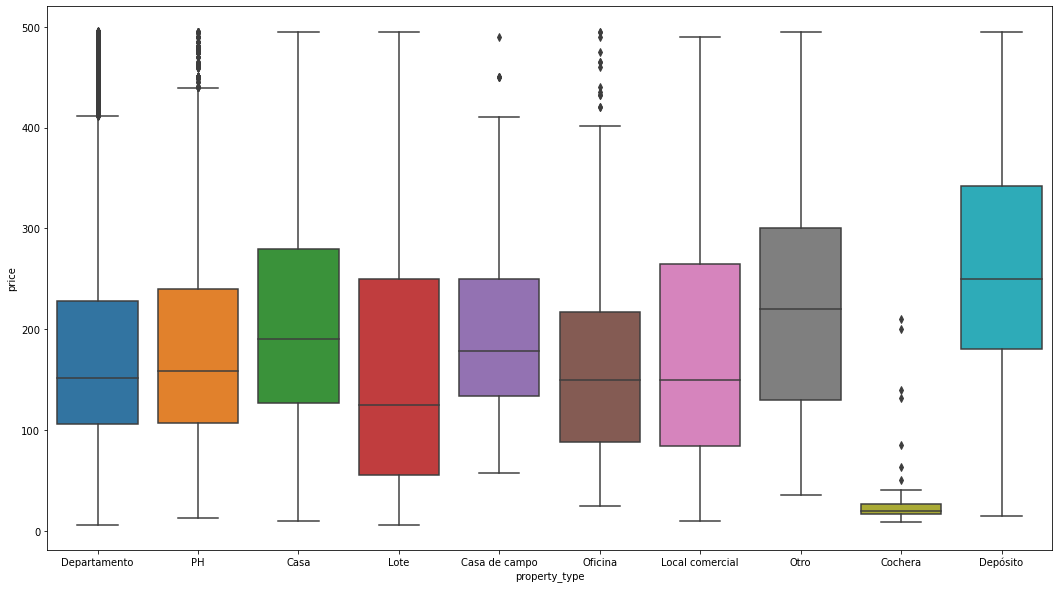

In [66]:
#se aplica un reemplazo de variables para ajustar la escala 
precio = data_r.price/1000

#se grafica nuevamente separando por categoría de propiedad
plt.figure(figsize=(18,10))
sns.boxplot(y = precio, x = data_r.property_type)

Ahora sí, vemos que los valores extremos están en rangos aceptables, excepto en el tipo de propiedad "cochera", cuyos valores en general son considerablemente más bajos.

In [67]:
data_r["price"].describe()

count    135666.000000
mean     182280.107735
std       98560.465932
min        5500.000000
25%      109000.000000
50%      158000.000000
75%      238000.000000
max      495800.000000
Name: price, dtype: float64

In [15]:
#La nueva base de datos sin outliers, indica un valor medio por apartamento de 182.280 USD/Propiedad y una desviación de 98.560USD/propiedad.
# el75% de los datos está a menos de 1 desviación y el valor extremo está a menos de 6 desviaciones

C:\Users\alexander.valencia\Anaconda3\envs\geo_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


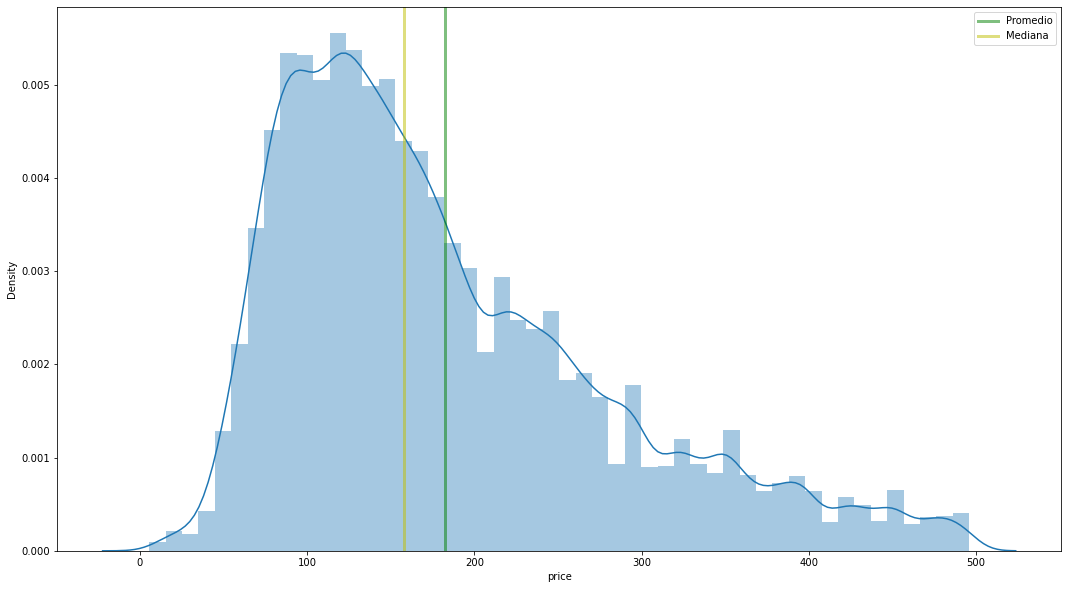

In [68]:
#De nuevo se grafica  la distribución de los precios
plt.figure(figsize=(18,10))
sns.distplot(precio)
plt.axvline(x=precio.mean(), linewidth=3, color='g', label="Promedio", alpha=0.5)
plt.axvline(x=precio.median(), linewidth=3, color='y', label="Mediana", alpha=0.5)
plt.legend()

In [18]:
# se aprecia una distribución gaussiana con una asimetría o cola hacia la derecha, 

**Valores faltantes**

In [69]:
#Una vez eliminadoslos valores extremos se tiene que:
print("La Base de datos contiene %d filas y %d columnas"%(data_r.shape[0],data_r.shape[1]))

La Base de datos contiene 135666 filas y 9 columnas


In [70]:
#Los valores faltantes por columna s

print("# de datos faltantes por columna")
print(data_r.isna().sum())
print("----------------")
print("Datos faltantes por columna (%)")
print(round((data_r.isna().sum() * 100/ len(datos_limpios)),2).sort_values(ascending=False))
print("----------------")


# de datos faltantes por columna
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5389
surface_total      19176
surface_covered    20132
price                  0
property_type          0
dtype: int64
----------------
Datos faltantes por columna (%)
surface_covered    13.73
surface_total      13.08
bathrooms           3.67
l2                  0.00
l3                  0.00
rooms               0.00
bedrooms            0.00
price               0.00
property_type       0.00
dtype: float64
----------------


In [21]:
#Retomando el análisis de faltantes por tipo de propiedad, es interesante indagar una posible causa para el tipo de faltante MCAR o MAR

In [71]:
br = data_r.bathrooms.isna().groupby([data_r["property_type"]]).sum().astype(int)
br

property_type
Casa               1215
Casa de campo        19
Cochera             250
Departamento       2620
Depósito            118
Local comercial     119
Lote                680
Oficina             108
Otro                 83
PH                  177
Name: bathrooms, dtype: int32

In [72]:
sc = data_r.surface_covered.isna().groupby([data_r["property_type"]]).sum().astype(int)
sc

property_type
Casa                4384
Casa de campo         62
Cochera              257
Departamento       13389
Depósito             144
Local comercial      238
Lote                1039
Oficina              267
Otro                 200
PH                   152
Name: surface_covered, dtype: int32

In [73]:
lo = data_r[(properati_ds.property_type.isin(["Lote"]))]
lo.sample(20)

C:\Users\alexander.valencia\AppData\Local\Temp\ipykernel_18820\3516673391.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lo = data_r[(properati_ds.property_type.isin(["Lote"]))]


l2                   l3  rooms  bedrooms  \
124149    Bs.As. G.B.A. Zona Sur      Lomas de Zamora    1.0       0.0   
103577  Bs.As. G.B.A. Zona Oeste            Ituzaingó    1.0       0.0   
101601    Bs.As. G.B.A. Zona Sur      Lomas de Zamora    6.0       0.0   
15361            Capital Federal            Chacarita    4.0       3.0   
103602           Capital Federal        Villa Urquiza    1.0       0.0   
99483     Bs.As. G.B.A. Zona Sur   Esteban Echeverría    1.0       0.0   
121857    Bs.As. G.B.A. Zona Sur          Berazategui    1.0       1.0   
99178     Bs.As. G.B.A. Zona Sur               Ezeiza    1.0       0.0   
124023    Bs.As. G.B.A. Zona Sur               Ezeiza    1.0       0.0   
11242   Bs.As. G.B.A. Zona Norte  Malvinas Argentinas    5.0       4.0   
38135   Bs.As. G.B.A. Zona Norte        Vicente López    1.0       1.0   
65018     Bs.As. G.B.A. Zona Sur              Quilmes    4.0       3.0   
124125    Bs.As. G.B.A. Zona Sur      Almirante Brown    1.0       0.0   
1608    Bs.As. G.B.A. Zona Norte              Escobar    1.0       1.0   
129533  Bs.As. G.B.A. Zona Norte              Escobar    1.0       1.0   
103584    Bs.As. G.B.A. Zona Sur          Berazategui    1.0       0.0   
76118   Bs.As. G.B.A. Zona Norte   General San Martín    4.0       3.0   
90032     Bs.As. G.B.A. Zona Sur                Lanús    1.0       1.0   
62509   Bs.As. G.B.A. Zona Norte                Pilar    1.0       1.0   
76201   Bs.As. G.B.A. Zona Norte                Tigre    1.0       1.0   

        bathrooms  surface_total  surface_covered     price property_type  
124149        NaN            NaN              NaN  230000.0          Lote  
103577        NaN            NaN              NaN  120000.0          Lote  
101601        3.0            NaN              NaN  400000.0          Lote  
15361         2.0          160.0              NaN  210000.0          Lote  
103602        NaN            NaN              NaN  345000.0          Lote  
99483         NaN            NaN              NaN  340000.0          Lote  
121857        NaN          778.0              NaN   75000.0          Lote  
99178         NaN            NaN              NaN   65000.0          Lote  
124023        NaN            NaN              NaN   74000.0          Lote  
11242         NaN          364.0              NaN   57500.0          Lote  
38135         1.0          359.0              NaN  160000.0          Lote  
65018         1.0          121.0              NaN  100000.0          Lote  
124125        NaN            NaN              NaN   67000.0          Lote  
1608          NaN          915.0              NaN   16000.0          Lote  
129533        1.0          428.0              NaN   45000.0          Lote  
103584        NaN            NaN              NaN  120000.0          Lote  
76118         1.0          392.0              NaN  185000.0          Lote  
90032         NaN          510.0              NaN  125000.0          Lote  
62509         NaN          570.0              NaN   20000.0          Lote  
76201         NaN          530.0              NaN  175000.0          Lote

In [38]:
#Nótese que "Casa", "Depertamento" y "Lote", son los tipos de propiedad con mas faltantes de valores de superficie y nro de baños
#Este comportamiento no parece denotar un patrón lógico o adrede para omitir información. De nuevo parece que la hipótesis de que los datos
#faltantes son del tipo aleatorio MCAR; es decir, no se capturaron adecuadamente.

In [25]:
#Debido a la relevancia de los atributos #de baños y superficie del sitio para determinar su significancia en el modelo predictor, se ejecutará una
#rutina de imputación de características faltantes rellenado los registros vacíos con los promedios típicos para el mismo grupo de propiedades

In [74]:
#Imputar valores faltantes en bathrooms según tipo de propiedad
data_r["bathrooms"] = data_r.groupby("property_type")["bathrooms"].transform(lambda grp: grp.fillna(np.mean(grp)))

#Imputar valores faltantes en surface_total según tipo de propiedad
data_r["surface_total"] = data_r.groupby("property_type")["surface_total"].transform(lambda grp: grp.fillna(np.mean(grp)))

#Imputar valores faltantes en surface_covered según tipo de propiedad
data_r["surface_covered"] = data_r.groupby("property_type")["surface_covered"].transform(lambda grp: grp.fillna(np.mean(grp)))

data_r.isna().sum()

C:\Users\alexander.valencia\AppData\Local\Temp\ipykernel_18820\596970451.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_r["bathrooms"] = data_r.groupby("property_type")["bathrooms"].transform(lambda grp: grp.fillna(np.mean(grp)))
C:\Users\alexander.valencia\AppData\Local\Temp\ipykernel_18820\596970451.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_r["surface_total"] = data_r.groupby("property_type")["surface_total"].transform(lambda grp: grp.fillna(np.mean(grp)))
C:\Users\alexander.valen

l2                 0
l3                 0
rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
property_type      0
dtype: int64

In [75]:
#Se procede  a verificar si algunos faltantes han sido imputados, con una muestra de 20 registros
data_r.sample(20)

l2                   l3  rooms  bedrooms  \
33545            Capital Federal             Recoleta    2.0       1.0   
21695            Capital Federal         Villa Devoto    4.0       3.0   
22945            Capital Federal              Almagro    2.0       1.0   
137600  Bs.As. G.B.A. Zona Norte                Pilar    2.0       1.0   
19601            Capital Federal  Villa General Mitre    1.0       0.0   
1832    Bs.As. G.B.A. Zona Norte         San Fernando    3.0       2.0   
141772           Capital Federal             Belgrano    4.0       3.0   
49384            Capital Federal              Almagro    2.0       1.0   
110564           Capital Federal              Almagro    3.0       2.0   
144842    Bs.As. G.B.A. Zona Sur              Quilmes    3.0       2.0   
123382    Bs.As. G.B.A. Zona Sur      Almirante Brown    2.0       0.0   
10345   Bs.As. G.B.A. Zona Oeste                Morón    2.0       1.0   
89586            Capital Federal        Villa Urquiza    2.0       1.0   
96336            Capital Federal         Villa Devoto    4.0       3.0   
61886            Capital Federal        Villa Soldati    4.0       2.0   
140999           Capital Federal            Caballito    4.0       3.0   
31391            Capital Federal     Parque Chacabuco    3.0       2.0   
104886  Bs.As. G.B.A. Zona Oeste                Morón    3.0       2.0   
76245            Capital Federal             Belgrano    2.0       1.0   
133968           Capital Federal              Palermo    4.0       2.0   

        bathrooms  surface_total  surface_covered     price property_type  
33545         1.0      64.000000        64.000000  130000.0  Departamento  
21695         2.0     178.000000       160.000000  260000.0            PH  
22945         1.0      66.000000        50.000000  165000.0  Departamento  
137600        2.0      58.000000        52.000000  108000.0  Departamento  
19601         1.0      88.676499        75.546016   72335.0  Departamento  
1832          1.0     100.000000        84.000000  190000.0  Departamento  
141772        4.0     183.000000       173.000000  365000.0  Departamento  
49384         1.0      52.000000        48.000000  178000.0  Departamento  
110564        1.0      66.000000        63.000000  164990.0  Departamento  
144842        1.0      60.000000        40.000000   38000.0            PH  
123382        1.0     606.764638       210.350121   78000.0          Casa  
10345         1.0      40.000000        38.000000   71000.0  Departamento  
89586         1.0      50.000000        42.000000  129900.0  Departamento  
96336         2.0     132.000000       126.000000  370000.0  Departamento  
61886         2.0     316.000000       138.000000  177000.0          Casa  
140999        2.0     125.000000       120.000000  298000.0  Departamento  
31391         1.0      63.000000        60.000000  130000.0  Departamento  
104886        1.0      88.676499        75.546016  149000.0  Departamento  
76245         1.0      62.000000        54.000000  255000.0  Departamento  
133968        3.0     116.000000       106.000000  380000.0  Departamento

In [28]:
#Otro pre-procesamiento necesario tiene que ver con la consistencia entre superficie total y cubierta. En la muestra inicial de 20 registros,
#se Ha detectado que la propiedad 34201 poesee un área cubierta de 37m2 y una área total de 36m2, algo ilógico.
#Desde el punto de vista conceptual, no tiene sentido que haya propiedades con una área cubierta que el área total
#De ocurrir esto, es necesario corrgegir por medio de imputación mediante sustitución por igualación:

In [76]:
#Consulta para detectar inconsistencia en las áreas.
r = data_r["surface_covered"] > data_r["surface_total"]
r.sum()

1939

In [30]:
#En efecto se encontraron 1939 registros con inconsistencia de area, Se procede a la sustitución, igualando las áreas, asi:

In [77]:
#
data_r.loc[data_r["surface_covered"] > data_r["surface_total"], "surface_covered"] = data_r["surface_total"]

In [78]:
#Se verifica si permanencen  mediante una rutina que compare que los registros de superficie cubierta sean mayores a los de superficie total:
r = data_r["surface_covered"] > data_r["surface_total"]
r.sum()

0

In [79]:
#Se comprueba con una pequeña muestra de 15 registros tenga o no discrepancias:
data_r.sample(15)

l2                l3  rooms  bedrooms  \
19308            Capital Federal       San Nicolás    2.0       1.0   
17631   Bs.As. G.B.A. Zona Norte        San Isidro    2.0       1.0   
76464            Capital Federal           Almagro    2.0       1.0   
34710            Capital Federal          Belgrano    2.0       1.0   
84229   Bs.As. G.B.A. Zona Norte             Tigre    3.0       2.0   
22049            Capital Federal  Parque Patricios    4.0       3.0   
136395           Capital Federal          Recoleta    2.0       1.0   
60761            Capital Federal         Caballito    3.0       2.0   
11239   Bs.As. G.B.A. Zona Norte     Vicente López    5.0       4.0   
49712            Capital Federal          Belgrano    3.0       2.0   
133401    Bs.As. G.B.A. Zona Sur           Quilmes    2.0       1.0   
106145  Bs.As. G.B.A. Zona Oeste   Tres de Febrero    7.0       6.0   
71284   Bs.As. G.B.A. Zona Norte      San Fernando    4.0       3.0   
121259  Bs.As. G.B.A. Zona Oeste             Morón    4.0       3.0   
62290            Capital Federal          Belgrano    3.0       2.0   

        bathrooms  surface_total  surface_covered     price property_type  
19308         1.0      43.000000        43.000000   78000.0  Departamento  
17631         2.0      70.000000        70.000000  205000.0  Departamento  
76464         1.0      65.000000        48.000000  167500.0  Departamento  
34710         1.0      40.000000        40.000000  122000.0  Departamento  
84229         2.0      76.000000        63.000000  140000.0  Departamento  
22049         1.0     116.000000        76.000000  110000.0            PH  
136395        1.0      42.000000        40.000000  145000.0  Departamento  
60761         2.0      65.000000        58.000000  159000.0  Departamento  
11239         1.0     260.000000       190.000000  345000.0          Casa  
49712         2.0      82.000000        78.000000  319500.0  Departamento  
133401        1.0      43.000000        39.000000   76000.0  Departamento  
106145        2.0      88.676499        75.546016  225000.0  Departamento  
71284         2.0     120.000000        90.000000  165000.0            PH  
121259        1.0     606.764638       210.350121  215000.0          Casa  
62290         2.0      68.000000        61.000000  218000.0  Departamento

In [ ]:
# De esta muestra de 15 registros, ninguno posee valores de superficie iconsistentes

**Encoding**

El próximo paso es convertir los valores categóricos en numéricos, para poder incorporarlos al algoritmo de machine learning y realizar una mejor predicción que en proyecto anterior. Hay dos formas de lograr esto: one hot encoding y label encoding.

En One Hot Encoding vamos a tomar la columna que tiene datos categóricos, que ha sido codificada con etiquetas, y luego dividirla en múltiples columnas. Los números se reemplazan por 1 y 0, dependiendo de qué columna tiene qué valor. El problema, sin embargo, es que si tenemos muchas categorías vamos a terminar con un dataset muy grande.

Label encoding, por su parte, identifica los distintos valores existentes y sustituye cada uno de ellos por un número. El problema que presenta esta codificacion es que, ya que hay diferentes números en la misma columna, el modelo puede malinterpretar los datos para que estén en algún tipo de orden, 0 < 1 < 2, aunque este no sea el caso.

In [35]:
#ENCODING
#Dentro del Data Frame, persisten atributos categóricos que deben ser convertidos en numéricos, esto con el fin de mejorar la predicción
#del modelo de regresión encontrado en el Sprint 1. Para esto se aplicarán dos técnicas de conversión:  (a) One-Hot Encoding y (b) Label Encoding. Para la opción (a), se tomará una columna 
#con datos categóricos ya codificada con etiquetas y se dividirá en múltiples columnas, de tal modo que se rellenara con valores binarios (1,0) si la nueva columna contiene el atributo etiquetado o no.
#Esto puede generar un crecimiento importante en la cantidad de columnas, en el dado caso que existan múltiples etiquetas.
#Para la técnica (b), se identifican diferentes valores de calificación pre-existentes y serán sustituidos por números a lo largo de una escala de valores. Sin embargo, esta técnica puede
# generar confusión en el modelo ya que si dentro de una columna se repite un número asignado, se puede mal-interpretar algún tipo de orden cardinal entre los registros que no siempre son 
#consistentes con la naturaleza del fenómeno observado.

#ACA VOY!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [80]:
#Rutina (a) One-hot encoding por tipo de propiedad:
propiedades = pd.get_dummies(data_r["property_type"])  #convierte las variables categóricas a una nueva serie binaria de 0 y 1
data_s = pd.concat([data_r, propiedades], axis = 1) #para sumar las nuevas columnas
data_s.head()

l2             l3  rooms  bedrooms  bathrooms  \
0         Capital Federal  San Cristobal    7.0       7.0        2.0   
1         Capital Federal          Boedo    2.0       1.0        2.0   
2         Capital Federal        Palermo    2.0       1.0        1.0   
3         Capital Federal        Palermo    2.0       1.0        1.0   
4  Bs.As. G.B.A. Zona Sur       La Plata    2.0       1.0        1.0   

   surface_total  surface_covered     price property_type  Casa  \
0          140.0            140.0  153000.0  Departamento     0   
1           70.0             58.0  159000.0            PH     0   
2           45.0             45.0  125000.0            PH     0   
3           85.0             50.0  295000.0            PH     0   
4           50.0             35.0   40000.0            PH     0   

   Casa de campo  Cochera  Departamento  Depósito  Local comercial  Lote  \
0              0        0             1         0                0     0   
1              0        0             0         0                0     0   
2              0        0             0         0                0     0   
3              0        0             0         0                0     0   
4              0        0             0         0                0     0   

   Oficina  Otro  PH  
0        0     0   0  
1        0     0   1  
2        0     0   1  
3        0     0   1  
4        0     0   1

In [81]:
print("El dataset ahora tiene %d columnas"%(data_s.shape[1]))

El dataset ahora tiene 19 columnas


In [82]:
#Rutina (a) One-hot encoding por localidad
localidad = pd.get_dummies(data_s["l2"])
data_t = pd.concat([data_s, localidad], axis = 1)
data_t.head()

l2             l3  rooms  bedrooms  bathrooms  \
0         Capital Federal  San Cristobal    7.0       7.0        2.0   
1         Capital Federal          Boedo    2.0       1.0        2.0   
2         Capital Federal        Palermo    2.0       1.0        1.0   
3         Capital Federal        Palermo    2.0       1.0        1.0   
4  Bs.As. G.B.A. Zona Sur       La Plata    2.0       1.0        1.0   

   surface_total  surface_covered     price property_type  Casa  ...  \
0          140.0            140.0  153000.0  Departamento     0  ...   
1           70.0             58.0  159000.0            PH     0  ...   
2           45.0             45.0  125000.0            PH     0  ...   
3           85.0             50.0  295000.0            PH     0  ...   
4           50.0             35.0   40000.0            PH     0  ...   

   Depósito  Local comercial  Lote  Oficina  Otro  PH  \
0         0                0     0        0     0   0   
1         0                0     0        0     0   1   
2         0                0     0        0     0   1   
3         0                0     0        0     0   1   
4         0                0     0        0     0   1   

   Bs.As. G.B.A. Zona Norte  Bs.As. G.B.A. Zona Oeste  Bs.As. G.B.A. Zona Sur  \
0                         0                         0                       0   
1                         0                         0                       0   
2                         0                         0                       0   
3                         0                         0                       0   
4                         0                         0                       1   

   Capital Federal  
0                1  
1                1  
2                1  
3                1  
4                0  

[5 rows x 23 columns]

In [83]:
print("El dataset ahora tiene %d columnas"%(data_t.shape[1]))

El dataset ahora tiene 23 columnas


In [84]:
#One-hot encoding produjo 4 columnas adicionales, pasando de 19 a 23  cuando se aplicó sobre la etiqueta "localidad", sin embargo, si se aplica sobre la etiqueta barrios, la cantidad de columnas nuevas
#puede superar más de 80, por lo que podria no ser manejable. Una alternativa para identificar el desempeño del modelo ampliado, consiste en generar dos dataframes, uno por cada ejecución de one-hot
#encoding. Al final se compararán ambos data frames respecto al desempeño.

#(a)One-hot encoding por barrios
barrio = pd.get_dummies(data_t["l3"])
data_u = pd.concat([data_t, barrio], axis = 1)
data_u.head()

l2             l3  rooms  bedrooms  bathrooms  \
0         Capital Federal  San Cristobal    7.0       7.0        2.0   
1         Capital Federal          Boedo    2.0       1.0        2.0   
2         Capital Federal        Palermo    2.0       1.0        1.0   
3         Capital Federal        Palermo    2.0       1.0        1.0   
4  Bs.As. G.B.A. Zona Sur       La Plata    2.0       1.0        1.0   

   surface_total  surface_covered     price property_type  Casa  ...  \
0          140.0            140.0  153000.0  Departamento     0  ...   
1           70.0             58.0  159000.0            PH     0  ...   
2           45.0             45.0  125000.0            PH     0  ...   
3           85.0             50.0  295000.0            PH     0  ...   
4           50.0             35.0   40000.0            PH     0  ...   

   Villa Lugano  Villa Luro  Villa Ortuzar  Villa Pueyrredón  Villa Real  \
0             0           0              0                 0           0   
1             0           0              0                 0           0   
2             0           0              0                 0           0   
3             0           0              0                 0           0   
4             0           0              0                 0           0   

   Villa Riachuelo  Villa Santa Rita  Villa Soldati  Villa Urquiza  \
0                0                 0              0              0   
1                0                 0              0              0   
2                0                 0              0              0   
3                0                 0              0              0   
4                0                 0              0              0   

   Villa del Parque  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  

[5 rows x 112 columns]

In [85]:
#Nótese que se han generado 89 columnas adicionales, una por cada barrio
#Se eliminan las variables categoricas para el dataset final con one-hot encoding
dfoh = data_u.select_dtypes(exclude=['object'])
dfoh.head()

rooms  bedrooms  bathrooms  surface_total  surface_covered     price  Casa  \
0    7.0       7.0        2.0          140.0            140.0  153000.0     0   
1    2.0       1.0        2.0           70.0             58.0  159000.0     0   
2    2.0       1.0        1.0           45.0             45.0  125000.0     0   
3    2.0       1.0        1.0           85.0             50.0  295000.0     0   
4    2.0       1.0        1.0           50.0             35.0   40000.0     0   

   Casa de campo  Cochera  Departamento  ...  Villa Lugano  Villa Luro  \
0              0        0             1  ...             0           0   
1              0        0             0  ...             0           0   
2              0        0             0  ...             0           0   
3              0        0             0  ...             0           0   
4              0        0             0  ...             0           0   

   Villa Ortuzar  Villa Pueyrredón  Villa Real  Villa Riachuelo  \
0              0                 0           0                0   
1              0                 0           0                0   
2              0                 0           0                0   
3              0                 0           0                0   
4              0                 0           0                0   

   Villa Santa Rita  Villa Soldati  Villa Urquiza  Villa del Parque  
0                 0              0              0                 0  
1                 0              0              0                 0  
2                 0              0              0                 0  
3                 0              0              0                 0  
4                 0              0              0                 0  

[5 rows x 109 columns]

In [86]:
#Se obtienen 109 columnas 
#en este aparte se aplica la rutina (b) Label encoding para los barrios, de esta forma se agrupan los barrios que pertenecen a cada una de las categorías de localidad (l2)
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data_t["barrios"] = encoder.fit_transform(data_t["l3"])
data_t.head()

l2             l3  rooms  bedrooms  bathrooms  \
0         Capital Federal  San Cristobal    7.0       7.0        2.0   
1         Capital Federal          Boedo    2.0       1.0        2.0   
2         Capital Federal        Palermo    2.0       1.0        1.0   
3         Capital Federal        Palermo    2.0       1.0        1.0   
4  Bs.As. G.B.A. Zona Sur       La Plata    2.0       1.0        1.0   

   surface_total  surface_covered     price property_type  Casa  ...  \
0          140.0            140.0  153000.0  Departamento     0  ...   
1           70.0             58.0  159000.0            PH     0  ...   
2           45.0             45.0  125000.0            PH     0  ...   
3           85.0             50.0  295000.0            PH     0  ...   
4           50.0             35.0   40000.0            PH     0  ...   

   Local comercial  Lote  Oficina  Otro  PH  Bs.As. G.B.A. Zona Norte  \
0                0     0        0     0   0                         0   
1                0     0        0     0   1                         0   
2                0     0        0     0   1                         0   
3                0     0        0     0   1                         0   
4                0     0        0     0   1                         0   

   Bs.As. G.B.A. Zona Oeste  Bs.As. G.B.A. Zona Sur  Capital Federal  barrios  
0                         0                       0                1       63  
1                         0                       0                1       11  
2                         0                       0                1       48  
3                         0                       0                1       48  
4                         0                       1                0       33  

[5 rows x 24 columns]

In [87]:
#Y la última transformación consiste en eliminar las variables categoricas para el dataset final con label encoding
dflb = data_t.select_dtypes(exclude=['object'])
dflb.head()

rooms  bedrooms  bathrooms  surface_total  surface_covered     price  Casa  \
0    7.0       7.0        2.0          140.0            140.0  153000.0     0   
1    2.0       1.0        2.0           70.0             58.0  159000.0     0   
2    2.0       1.0        1.0           45.0             45.0  125000.0     0   
3    2.0       1.0        1.0           85.0             50.0  295000.0     0   
4    2.0       1.0        1.0           50.0             35.0   40000.0     0   

   Casa de campo  Cochera  Departamento  ...  Local comercial  Lote  Oficina  \
0              0        0             1  ...                0     0        0   
1              0        0             0  ...                0     0        0   
2              0        0             0  ...                0     0        0   
3              0        0             0  ...                0     0        0   
4              0        0             0  ...                0     0        0   

   Otro  PH  Bs.As. G.B.A. Zona Norte  Bs.As. G.B.A. Zona Oeste  \
0     0   0                         0                         0   
1     0   1                         0                         0   
2     0   1                         0                         0   
3     0   1                         0                         0   
4     0   1                         0                         0   

   Bs.As. G.B.A. Zona Sur  Capital Federal  barrios  
0                       0                1       63  
1                       0                1       11  
2                       0                1       48  
3                       0                1       48  
4                       1                0       33  

[5 rows x 21 columns]

In [91]:
# Se asignan X & y para correr one-hot encoding
X_o = dfoh.drop(["price"], axis = 1)
y_o = dfoh.price / 1000

In [92]:
#Y se ejecuta una rutina para  un Train/Test split de los datos
from sklearn.model_selection import train_test_split
X_train_o, X_test_o, y_train_o, y_test_o = train_test_split(X_o, y_o, train_size=0.8,test_size=0.2, random_state=42)

In [93]:
# Se asignan otras dos variables intermedidas X & y para ejecutar label encoding
X_l = dflb.drop(["price"], axis = 1)
y_l = dflb.price / 1000
X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(X_l, y_l, train_size=0.8,test_size=0.2, random_state=42)

**Evaluar los modelos del proyecto 1**

In [ ]:
#**Benchmarkin del Regresión lineal**

In [94]:
#Importar libreria del algoritmo
from sklearn.linear_model import LinearRegression

#También importamos las métricas
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

#Instanciar el objeto con los hiperparámetros por defecto
lr = LinearRegression()

#Se desarrolla training sobre el set de entrenamiento y luego rutina de predicción sobre el set de validación
#Para ambos datasets
lr.fit(X_train_o, y_train_o)
pred_o = lr.predict(X_test_o)

lr.fit(X_train_l, y_train_l)
pred_l = lr.predict(X_test_l)


#Resultado del primer modelo usando regresión lineal
error_o = round(mean_absolute_error(y_test_o, pred_o))
cd_o = r2_score(y_test_o, pred_o)

error_l = round(mean_absolute_error(y_test_l, pred_l))
cd_l = r2_score(y_test_l, pred_l)


print("Error absoluto medio con one-hot encoding: US$ "+str(error_o))
print("Coeficiente de determinación con one hot encoding: "+str(cd_o))
print("-----------")
print("Error absoluto medio con label encoding: US$ "+str(error_l))
print("Coeficiente de determinación con label encoding: "+str(cd_l))

Error absoluto medio con one-hot encoding: US$ 45
Coeficiente de determinación con one hot encoding: 0.5829434094752445
-----------
Error absoluto medio con label encoding: US$ 52
Coeficiente de determinación con label encoding: 0.4705638124709345


#Nótese que los resultados para One hot encoding son  mejores que para Label encoding; sin embargo, el Coeficiente de determinación difiere sustancialmente de los resultados en el proyecto anterior. Se continúa la comparación)

**Modelo de árboles de decisión**

In [95]:
#Se llamala rutina el algoritmo para Decision Tree regressor
from sklearn.tree import DecisionTreeRegressor

#Instanciar objeto con los hiperparámetros por defecto
tree = DecisionTreeRegressor(random_state=1)

#Entrenar sobre el set de entrenamiento y predecir sobre el set de validación

tree.fit(X_train_o, y_train_o)
pred_o = tree.predict(X_test_o)

tree.fit(X_train_l, y_train_l)
pred_l = tree.predict(X_test_l)


#Resultado del modelo
error_o = mean_absolute_error(y_test_o, pred_o)
cd_o = r2_score(y_test_o, pred_o)

error_l = mean_absolute_error(y_test_l, pred_l)
cd_l = r2_score(y_test_l, pred_l)


print("Error absoluto medio con one hot encoding: US$ "+str(error_o))
print("Coeficiente de determinación con one hot encoding: "+str(cd_o))
print("-----------")
print("Error absoluto medio con label encoding: US$ "+str(error_l))
print("Coeficiente de determinación con label encoding: "+str(cd_l))

Error absoluto medio con one hot encoding: US$ 26.760558718775854
Coeficiente de determinación con one hot encoding: 0.7494840596319301
-----------
Error absoluto medio con label encoding: US$ 27.081639442148624
Coeficiente de determinación con label encoding: 0.7442005476567534


<AxesSubplot:ylabel='price'>

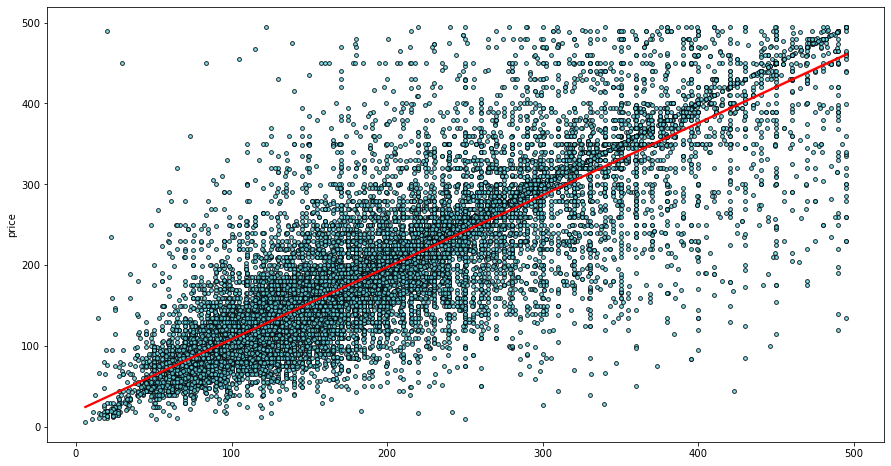

In [96]:
#Se Grafican los valores reales vs los obtenidos dele primer modelo para one-hot encoding
plt.figure(figsize=(15,8))
sns.regplot(y=y_test_o,x=pred_o,scatter_kws={"color": "#66d9ea","s":15,"edgecolors":"black"}, line_kws={"color": "red"})

**Modelo de K Vecinos más cercanos**

In [97]:
#Se importa el algoritmo de ML
from sklearn.neighbors import KNeighborsRegressor

#Instanciar el objeto con los hiperparámetros por defecto
knr = KNeighborsRegressor()

#Entrenar sobre el set de entrenamiento y predecir sobre el set de validación

knr.fit(X_train_o, y_train_o)
pred_o = knr.predict(X_test_o)

knr.fit(X_train_l, y_train_l)
pred_l = knr.predict(X_test_l)


#Ahora vemos qué resultado nos da este primer modelo
error_o = mean_absolute_error(y_test_o, pred_o)
cd_o = r2_score(y_test_o, pred_o)

error_l = mean_absolute_error(y_test_l, pred_l)
cd_l = r2_score(y_test_l, pred_l)


print("Error absoluto medio con one hot encoding: US$ "+str(error_o))
print("Coeficiente de determinación con one hot encoding: "+str(cd_o))
print("-----------")
print("Error absoluto medio con label encoding: US$ "+str(error_l))
print("Coeficiente de determinación con label encoding: "+str(cd_l))

Error absoluto medio con one hot encoding: US$ 35.350087440112034
Coeficiente de determinación con one hot encoding: 0.6661246356240771
-----------
Error absoluto medio con label encoding: US$ 34.48450976634481
Coeficiente de determinación con label encoding: 0.6812528707652881


<AxesSubplot:ylabel='price'>

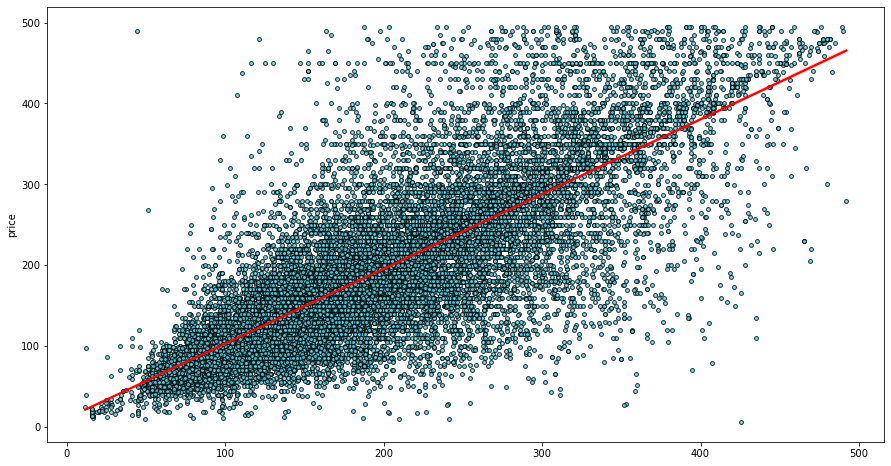

In [98]:
#Graficars los valores reales vs los obtenidos de este primer modelo para one-hot encoding
plt.figure(figsize=(15,8))
sns.regplot(y=y_test_o,x=pred_o,scatter_kws={"color": "#66d9ea","s":15,"edgecolors":"black"}, line_kws={"color": "red"})

In [55]:
#En el gráfico puede obrservarse una dispersión aparentemente similar a la obtenida mediante Árboles de Decisión.

In [56]:
#En esta etapa, se proponer indagar sobre posibles resultados obtenidos utilizando los hiperparámteros seleccionados del Proyecto 1 para ambos algoritmos, con el dataset con One-Hot Encoding, y comparar resultados.

In [99]:
#Instanciar el objeto con los hiperparámetros seleccionados (max_depth=10, random_state= 42)
tree = DecisionTreeRegressor(max_depth=10, min_samples_split=2, random_state=42)

#Entrenar sobre el set de entrenamiento y predecimos sobre el set de validación

tree.fit(X_train_o, y_train_o)
pred_o = tree.predict(X_test_o)

#Ahora vemos qué resultado nos da este modelo
error_o = mean_absolute_error(y_test_o, pred_o)
cd_o = r2_score(y_test_o, pred_o)

print("Error absoluto medio: US$ "+str(error_o))
print("Coeficiente de determinación: "+str(cd_o))

Error absoluto medio: US$ 38.21689103658677
Coeficiente de determinación: 0.689891050664136


In [100]:
#Instanciamos el objeto con los hiperparámetros seleccionados (n_neighbors = 3)
knr = KNeighborsRegressor(n_neighbors=3, weights="distance")

#Entrenamos sobre el set de entrenamiento y predecimos sobre el set de validación

knr.fit(X_train_o, y_train_o)
pred_o = knr.predict(X_test_o)

#Ahora vemos qué resultado nos da este modelo
error_o = mean_absolute_error(y_test_o, pred_o)
cd_o = r2_score(y_test_o, pred_o)

print("Error absoluto medio: US$ "+str(error_o))
print("Coeficiente de determinación: "+str(cd_o))

Error absoluto medio: US$ 28.938484912048867
Coeficiente de determinación: 0.710867687134056


In [64]:
#Nótese que con los hiperparámetros obtenidos del Proyecto 1,  los resultados fueron mixtos: en ambos casos bajó el error absoluto medio frente a los resultados del proyecto 1, pero el coeficiente de determinación disminuyó en ambos casos. 
#Respecto a este mismo ejercicio, se observa que los resultados obtenidos con el algoritmo de Árboles de Decisión son inferiores que los obtenidos con los hiperparámetros por defecto, 
#mientras que el desempeño es mejor para los KNN Vecinos.
#Una Conjetura del comportamiento visto, puede estar relacionado con las transformación aplicadas al Dataset, que incorporó una cantidad de características adicionales que modificarían las relaciones del dataset original en el Proyecto 1.

In [ ]:
#A partir de esta conclusón, es pertinente indagar por mejores hiperparámetros para este dataset aplicando la estrategia del GridSearch.

In [101]:
#Se llama la libreria GridSearch para determinar hiperparámetros adecuados al caso de estudio

from sklearn.model_selection import GridSearchCV

param_grid = {"min_samples_split": [2, 4, 8, 12],
              "max_depth": [20, 40, 80, 100, 120],
              "min_samples_leaf": [4, 8, 12, 20],
              }

grid_cv_dtr = GridSearchCV(tree, param_grid, cv = 5, n_jobs=-1)

grid_cv_dtr.fit(X_train_o, y_train_o)

GridSearchCV(cv=5,
             estimator=DecisionTreeRegressor(max_depth=10, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [20, 40, 80, 100, 120],
                         'min_samples_leaf': [4, 8, 12, 20],
                         'min_samples_split': [2, 4, 8, 12]})

In [102]:
print("Mejores parametros: "+str(grid_cv_dtr.best_params_))
print("Mejor Score: "+str(grid_cv_dtr.best_score_)+'\n')

Mejores parametros: {'max_depth': 80, 'min_samples_leaf': 4, 'min_samples_split': 12}
Mejor Score: 0.7539138925218571



In [103]:
pred_o = grid_cv_dtr.predict(X_test_o)

error_o = mean_absolute_error(y_test_o, pred_o)
cd_o = r2_score(y_test_o, pred_o)

print("Error absoluto medio: US$ "+str(error_o))
print("Coeficiente de determinación: "+str(cd_o))

Error absoluto medio: US$ 29.950312486078186
Coeficiente de determinación: 0.7612960594828364


<AxesSubplot:ylabel='price'>

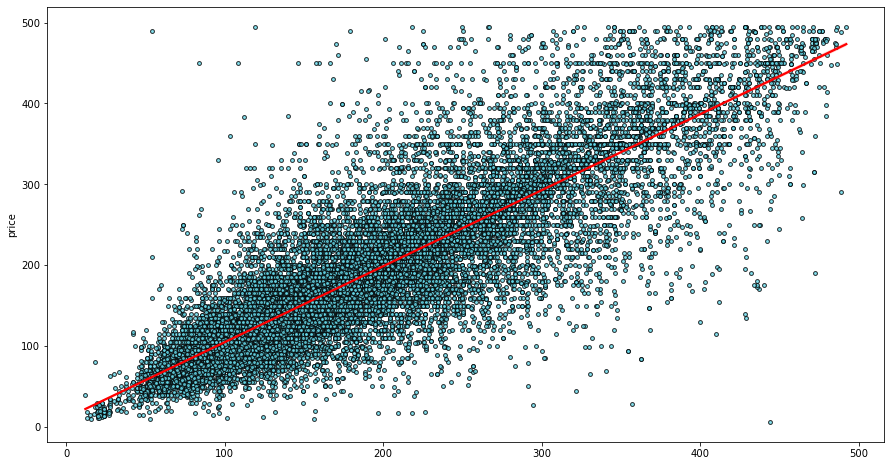

In [104]:
#Se procede a graficar los valores reales vs los obtenidos de este modelo  
plt.figure(figsize=(15,8))
sns.regplot(y=y_test_o,x=pred_o,scatter_kws={"color": "#66d9ea","s":15,"edgecolors":"black"}, line_kws={"color": "red"})

In [52]:
# Al ejecutar GridSearch se han obtenido métricas mejoradas para Árboles de Decisión, respecto a los modelos anteriores: el Error absoluto medio baja a USD 29.95 frente a USD 38.21, 
#y el Coeficiente de determinación se ubica en 0.76 frente a 0.74 del primer modelo. De manera visual se observa una concetración homogénea de los valores alrededor de la línea de regresión.

In [105]:
#Ejecutar GridSearch aplicado a KNN-Vecnios, Nota: TOMA MUCHO TIEMPO DEL PROCESADOR

param_grid = {'n_neighbors': np.arange(1, 20),
              'weights': ['uniform', 'distance']}


kknn = KNeighborsRegressor()
gscv = GridSearchCV(kknn, param_grid, n_jobs=-1)
gscv.fit(X_train_o, y_train_o)

GridSearchCV(estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'weights': ['uniform', 'distance']})

In [106]:
print("Mejores parametros: "+str(gscv.best_params_))
print("Mejor Score: "+str(gscv.best_score_)+'\n')

Mejores parametros: {'n_neighbors': 12, 'weights': 'distance'}
Mejor Score: 0.7263225225564522



In [107]:
pred_o = gscv.predict(X_test_o)

error_o = mean_absolute_error(y_test_o, pred_o)
cd_o = r2_score(y_test_o, pred_o)

print("Error absoluto medio: US$ "+str(error_o))
print("Coeficiente de determinación: "+str(cd_o))

Error absoluto medio: US$ 28.288430061962394
Coeficiente de determinación: 0.7344787737502804


<AxesSubplot:ylabel='price'>

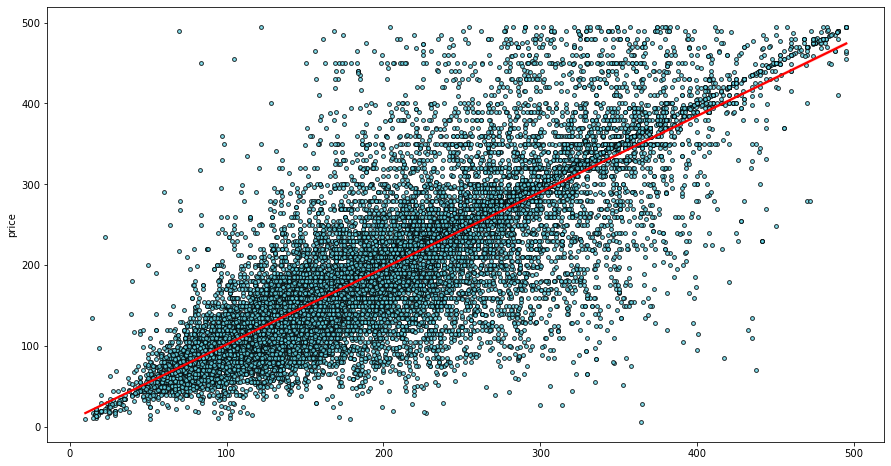

In [108]:
#Graficamos los valores reales vs los obtenidos de este modelo
plt.figure(figsize=(15,8))
sns.regplot(y=y_test_o,x=pred_o,scatter_kws={"color": "#66d9ea","s":15,"edgecolors":"black"}, line_kws={"color": "red"})

In [ ]:
#Con el ajuste realizado mediante Gridsearch el resultado es un tanto mejor respecto a los demás modelos de KNN vecinos empleado a la fecha.
#el Error absoluto medio pasa de 28.93 a 28.28, mientras que el Coeficiente de determinación subió de 0.712 a 0.73
#comparando las gráficas de dispersión, se nota un leve aumento en la concentración alrededor de la línea de tendencia ajustada.

**Reducción de dimensionalidad**

El siguiente paso para buscar un modelo con estos algoritmos buscará reducir las características del dataset, para agilizar su performance, y luego poder seleccionar mejores hiperparámetros.

Lo primero que vamos a hacer es buscar la correlación entre las variables, para ver cuáles se pueden eliminar.

In [109]:
correlacion = dfoh.corr()
correlacion.style.background_gradient(cmap="coolwarm")

In [ ]:
# la mayor correlación se da entre "rooms" y "bedrooms", por lo que se puede eliminar una de las dos variables. Aunque será necesario aplicar un algoritmo de reducción de dimensionalidad para ajustar aún más
#el tamaño del Dataset

In [110]:
#Se elimina  bedrooms
df = dfoh.drop("bedrooms", axis = 1)

In [ ]:
#Para la reducción de dimensionalidad, se utilizará PCA, que transforma el conjunto de datos en un nuevo conjunto de n dimensiones (componentes principales)

In [111]:
#Se nombran X e y, particiones del Data Set
X = df.drop(["price"], axis = 1)
y = df.price / 1000

In [113]:
#Se ejecuta un train/test split
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X, y, train_size=0.8,test_size=0.2, random_state=42)

In [114]:
#Se realiza preproceso de los datos
from sklearn.preprocessing import StandardScaler
x_scaler = StandardScaler()
x_scaler = x_scaler.fit(X_train_pca) #solo se escala el set de train para evitar fuga de datos
x_train = x_scaler.transform(X_train_pca)
x_test = x_scaler.transform(X_test_pca)


In [115]:
#Se llama la rutina  PCA, dejando que maximice la varianza hasta un 95%

from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)
pca.fit(x_train)
x_train_p = pca.transform(x_train)
x_test_p = pca.transform(x_test)

In [116]:
x_train_p.shape

(108532, 94)

In [ ]:
#El algoritmo de PCA redujo el dataset de 119 a  94 features.

In [117]:
#Se aplicará GridSearch para determinar hiperparámetros para un árbol de decisión

tree_pca = DecisionTreeRegressor(random_state=1)

param_grid = {"min_samples_split": [2, 4, 8, 12],
              "max_depth": [20, 40, 80, 100, 120],
              "min_samples_leaf": [4, 8, 12, 20],
              }

grid_cv_dtr = GridSearchCV(tree_pca, param_grid, cv = 5, n_jobs=-1)

grid_cv_dtr.fit(x_train_p, y_train_pca)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [20, 40, 80, 100, 120],
                         'min_samples_leaf': [4, 8, 12, 20],
                         'min_samples_split': [2, 4, 8, 12]})

In [118]:
print("Mejores parametros: "+str(grid_cv_dtr.best_params_))
print("Mejor Score: "+str(grid_cv_dtr.best_score_))


Mejores parametros: {'max_depth': 40, 'min_samples_leaf': 8, 'min_samples_split': 2}
Mejor Score: 0.7452656771584723


In [119]:
pred_pca = grid_cv_dtr.predict(x_test_p)

error_pca = mean_absolute_error(y_test_pca, pred_pca)
cd_pca = r2_score(y_test_pca, pred_pca)

print("Error absoluto medio: US$ "+str(error_pca))
print("Coeficiente de determinación: "+str(cd_pca))

Error absoluto medio: US$ 30.034490903164073
Coeficiente de determinación: 0.7597044475361162


<AxesSubplot:ylabel='price'>

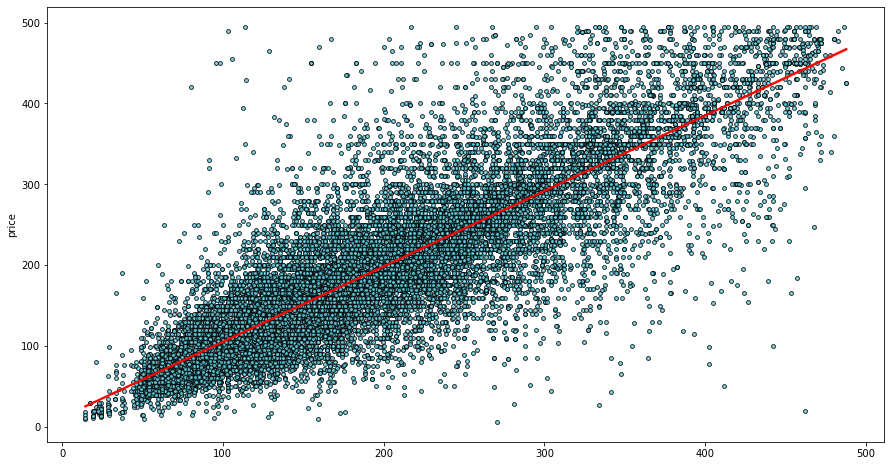

In [120]:
#Graficamos los valores reales vs los obtenidos de este modelo
plt.figure(figsize=(15,8))
sns.regplot(y=y_test_pca,x=pred_pca,scatter_kws={"color": "#66d9ea","s":15,"edgecolors":"black"}, line_kws={"color": "red"})

**PARTE B - Modelos Avanzados**

1.Elige dos de los modelos avanzados vistos. Compara con el desempeño obtenido en el proyecto 01 (en el caso de regresión, considera una regresión lineal con atributos polinómicos y regularización). Entrénalos y evalúalos con sus argumentos por defecto. No te olvides de hacer un train/test split y usar Validación Cruzada.

1.Optimiza sus hiperparámetros mediante Validación Cruzada y Grid Search o Random Search.

1.Compara el desempeño de los nuevos modelos entre sí y con el modelo de la Parte A. ¿Cuál elegirías? Justifica.

**XGboost Vs Random Forest**

**Random Forest**

In [122]:
#Se importan los módulos de Sklearn y Xgboost
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

C:\Users\alexander.valencia\Anaconda3\envs\geo_env\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [123]:
#Se divide nuevamente  el dataset
X = df.drop(["price"], axis = 1)
y = df.price / 1000

#Se realiza un entrenamiento y prueba train/test split"
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X, y, train_size=0.8,test_size=0.2, random_state=69)

#Marca para Hyperopt

In [70]:
#Entrenar el modelo aplicando la optimización de Random Forest:

#Instanciar el objeto con los hiperparámetros por defecto
regr = RandomForestRegressor(random_state=0).fit(X_train_a, y_train_a)

pred_a = regr.predict(X_test_a)

#Resultados, métricas de desempeño
error_a = mean_absolute_error(y_test_a, pred_a)
cd_a = r2_score(y_test_a, pred_a)

print("Error absoluto medio: "+str(error_a))
print("Coeficiente de determinación: "+str(cd_a))

Error absoluto medio: 24.742546109201356
Coeficiente de determinación: 0.8216535646762375


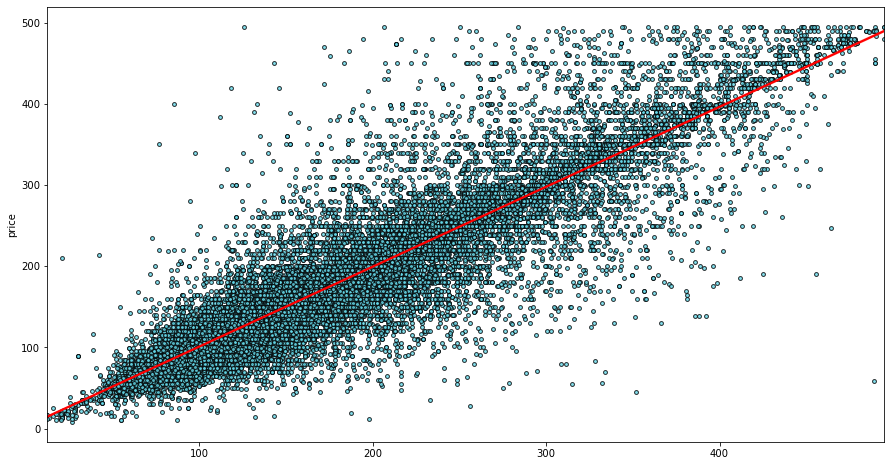

In [71]:
#se grafican valores reales vs los obtenidos de este modelo
plt.figure(figsize=(15,8))
sns.regplot(y=y_test_a,x=pred_a,scatter_kws={"color": "#66d9ea","s":15,"edgecolors":"black"}, line_kws={"color": "red"})

In [72]:
#Los parámetros por defecto del modelo re regresión son los siguientes:
regr.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [91]:
#Para obtener los parámetros optimizados del modelo usando Random Forest, se utiliza la herraminta RandomizedSearchCV 
#Se espera una menor duración de los cálculos, pués evalúa al azar vectores de parámetros, en vez de todo el espacio de soluciones posibles.

from sklearn.model_selection import RandomizedSearchCV

# Cantidad de árboles
n_estimators = [100, 400, 900]
# ¨Profundidad máxima
max_depth = [10, 50, 100, None]
# Número mínimo de muestras necesarias para dividir un nodo interno
min_samples_split = [2, 5, 10]
# Número mínimo de muestras que deben estar en cada nodo de la hoja
min_samples_leaf = [1, 2, 3]
# Crear la grilla
random_grid = {'n_estimators': n_estimators,              
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,}

rf_random = RandomizedSearchCV(regr, random_grid, n_iter = 25, verbose=2, cv = 3, random_state=42, n_jobs = -1)

rf_random.fit(X_train_a, y_train_a)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 50.0min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed: 107.9min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=0),
                   n_iter=25, n_jobs=-1,
                   param_distributions={'max_depth': [10, 50, 100, None],
                                        'min_samples_leaf': [1, 2, 3],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 400, 900]},
                   random_state=42, verbose=2)

In [92]:
print("Mejores parametros: "+str(rf_random.best_params_))
print("Mejor Score: "+str(rf_random.best_score_))

Mejores parametros: {'n_estimators': 900, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}
Mejor Score: 0.8014079624339282


In [93]:
#Volvemos a predecir con este modelo

pred_rs = rf_random.predict(X_test_a)

#Ahora vemos qué resultado nos da este modelo
error_rs = mean_absolute_error(y_test_a, pred_rs)
cd_rs = r2_score(y_test_a, pred_rs)

print("Error absoluto medio: "+str(error_rs))
print("Coeficiente de determinación: "+str(cd_rs))

Error absoluto medio: 24.703677985802248
Coeficiente de determinación: 0.8220950113167012


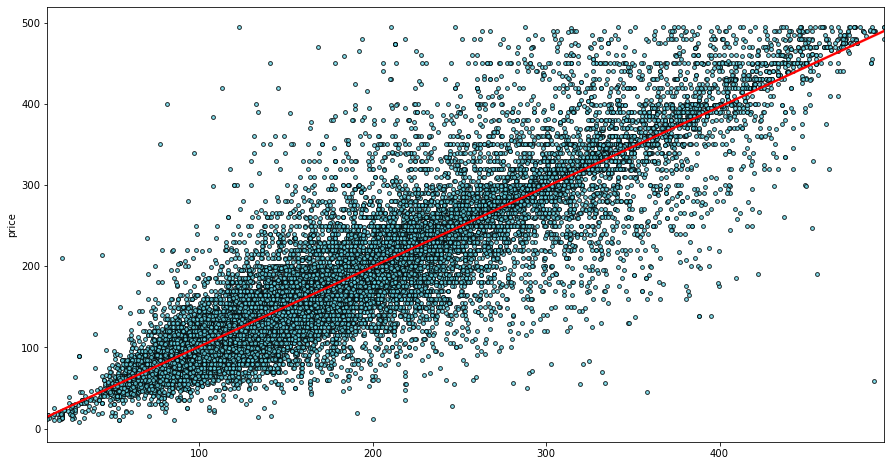

In [94]:
#Se grafican los valores observados vs modelo de pronóstico
plt.figure(figsize=(15,8))
sns.regplot(y=y_test_a,x=pred_rs,scatter_kws={"color": "#66d9ea","s":15,"edgecolors":"black"}, line_kws={"color": "red"})

**XGboost**

In [97]:
#Tomando el algoritmo XGBoost 

#Instanciar el objeto con los hiperparámetros por defecto (evaluando su desempeño sin optimizar)
xgrgr = XGBRegressor(random_state=1).fit(X_train_a, y_train_a)

pred_x = xgrgr.predict(X_test_a)

#Ahora vemos qué resultado nos da este modelo
error_x = mean_absolute_error(y_test_a, pred_x)
cd_x = r2_score(y_test_a, pred_x)

print("Error absoluto medio: "+str(error_x))
print("Coeficiente de determinación: "+str(cd_x))

Error absoluto medio: 32.824577809863044
Coeficiente de determinación: 0.7695203341915549


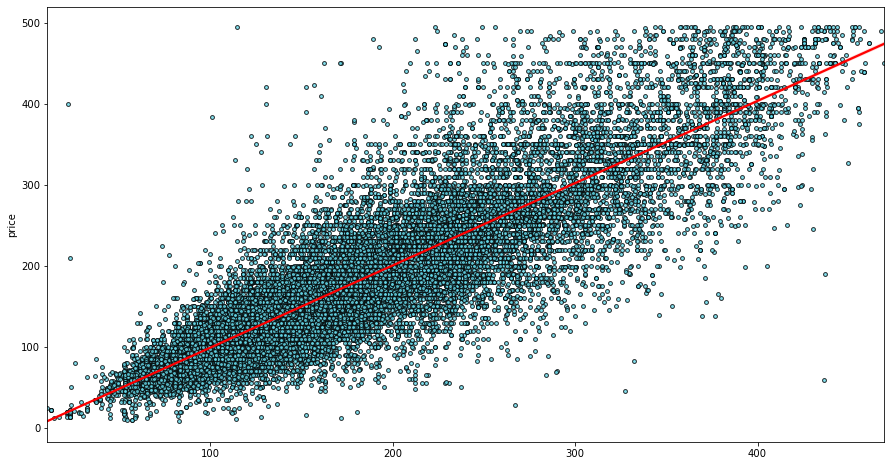

In [96]:
#Graficar valores observados vs los predicción de este modelo
plt.figure(figsize=(15,8))
sns.regplot(y=y_test_a,x=pred_x,scatter_kws={"color": "#66d9ea","s":15,"edgecolors":"black"}, line_kws={"color": "red"})

In [98]:
# RandomSearchCV para ajustar los hiperparámetros del modelo

# Cantidad de árboles
n_estimators = [50, 100, 150, 200]
# Profundidad máxima
max_depth = [2, 10, 50, None]
# Factor de contracción o tasa de aprendizaje
learning_rate = [0.05, 0.1, 0.3]

# Crear la grilla
random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_depth': max_depth}

xg_grid = RandomizedSearchCV(xgrgr, random_grid, n_iter = 10, verbose=2, cv = 3, random_state=42, n_jobs = -1)

xg_grid.fit(X_train_a, y_train_a)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 32.9min finished


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          gpu_id=-1, importance_type='gain',
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_delta_step=0, max_depth=6,
                                          min_child_weight=1, missing=nan,
                                          monotone_constraints='()',
                                          n_estimators=100, n_jobs=0,
                                          num_parallel_tree=1, random_state=1,
                                          reg_alpha=0, reg_lambda=1,
                                          scale_pos_

In [99]:
print("Mejores parametros: "+str(xg_grid.best_params_))
print("Mejor Score: "+str(xg_grid.best_score_))

Mejores parametros: {'n_estimators': 50, 'max_depth': 50, 'learning_rate': 0.1}
Mejor Score: 0.7911054927433715


In [100]:
#predecir con este modelo

pred_xg = xg_grid.predict(X_test_a)

#resultados de este modelo
error_xg = mean_absolute_error(y_test_a, pred_xg)
cd_xg = r2_score(y_test_a, pred_xg)

print("Error absoluto medio: "+str(error_xg))
print("Coeficiente de determinación: "+str(cd_xg))

Error absoluto medio: 24.295914753890894
Coeficiente de determinación: 0.8160721958063478


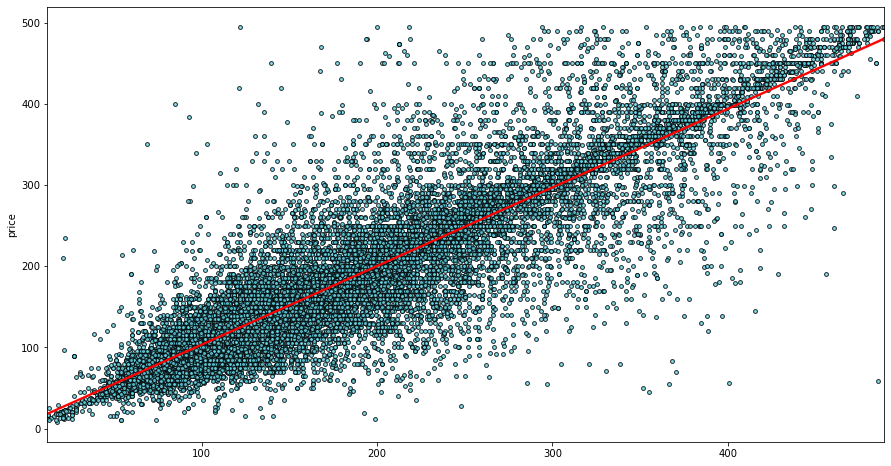

In [101]:
#Graficar los valores observados vs predicción de este modelo
plt.figure(figsize=(15,8))
sns.regplot(pred_xg, y_test_a, scatter_kws={"color": "#66d9ea","s":15,"edgecolors":"black"}, line_kws={"color": "red"})

**PARTE C - Interpretación de modelos**

De acuerdo a lo que el modelo permite, responde algunas o todas las siguientes preguntas:

-¿Qué variables fueron relevantes para el modelo para hacer una predicción? ¿Cuáles no? Si usaste una regresión lineal con regularización, presta atención a los parámetros (pendientes) obtenidas. Si usaste un modelo de ensamble en árboles, además de ver la importancia de cada atributo, también elige algunos árboles al azar y observa qué atributos considera importantes. ¿En qué se diferencian esos árboles? ¿Por qué? Finalmente, responde, ¿coincide con lo que esperabas a partir de tu experiencia con este dataset?

-¿Cómo es la distribución de errores (regresión) o qué clases se confunden entre sí (clasificación)? ¿Dónde falla? ¿A qué se debe?

In [78]:
from sklearn.ensemble import ExtraTreesRegressor

#Instanciar el modelo de ExtraTreesRegresor con los parámetros obtenidos

modelo = ExtraTreesRegressor(max_features='sqrt', n_estimators=267, n_jobs=1,
                    random_state=3, verbose=False).fit(X_train_a, y_train_a)

pred_et = modelo.predict(X_test_a)

error_et = mean_absolute_error(y_test_a, pred_et)
cd_et = r2_score(y_test_a, pred_et)

print("Error absoluto medio: "+str(error_et))
print("Coeficiente de determinación: "+str(cd_et))

Error absoluto medio: 23.39750516992061
Coeficiente de determinación: 0.8242581930778248


**Importancia de los atributos**

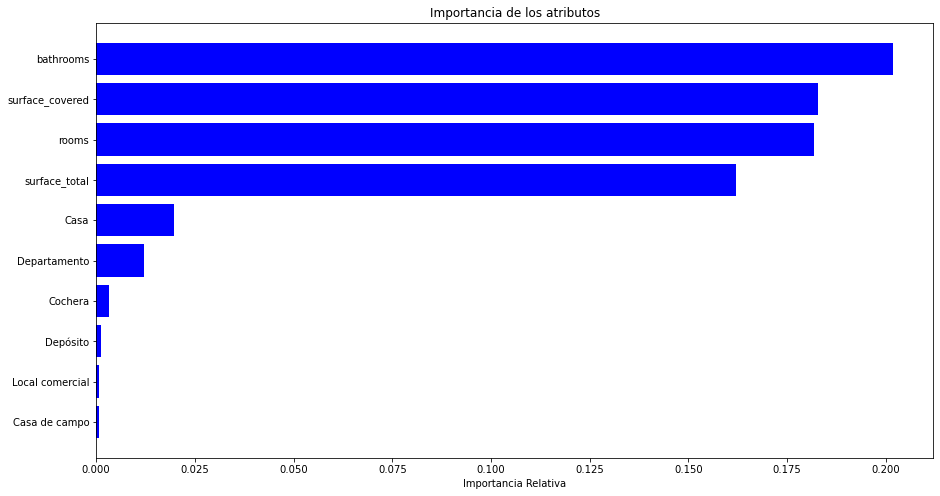

In [79]:
#Guardar el nombre de los atributos
features = X_train_a.columns

#Indagar por los atributos más importantes

#Indagar por los 10 atributos de mayor importancia, (dado que se tiene 100 en total)
importances = modelo.feature_importances_[:10]

#Ordenar

indices = np.argsort(importances)

#Graficar

plt.figure(figsize=(15,8))
plt.title('Importancia de los atributos')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Importancia Relativa')
plt.show()

#Después de aplicar la rutina para determinar la mayor importancia, se obtuvo en su orden: (1) Bathrooms, (2) Surface covered, (3) Rooms, (4) Surface Total y (5) Casa. Para #profundizar en la relevancia o peso de estros atributos en el modelo, se aplicará **Label Encoding**. Con esto es posible validar si el tipo de propiedad y los barrios  #pueden contribuir con un mayor peso en el modelo

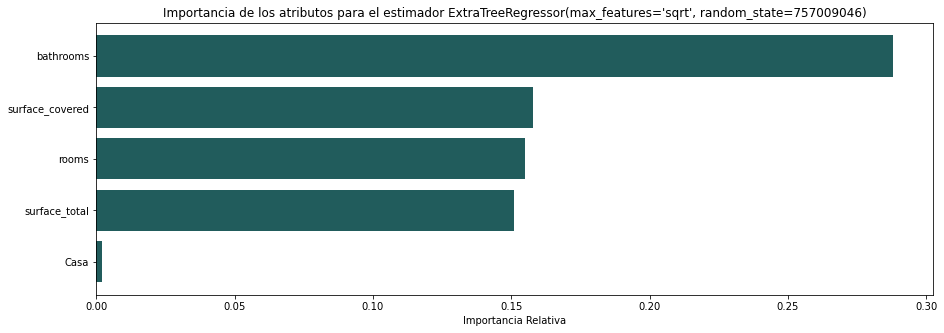

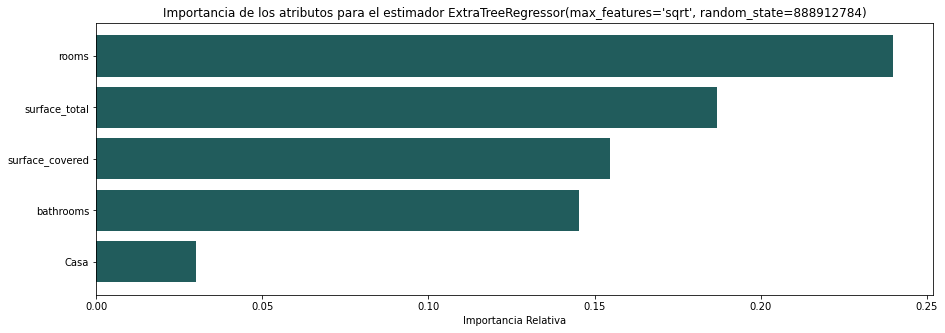

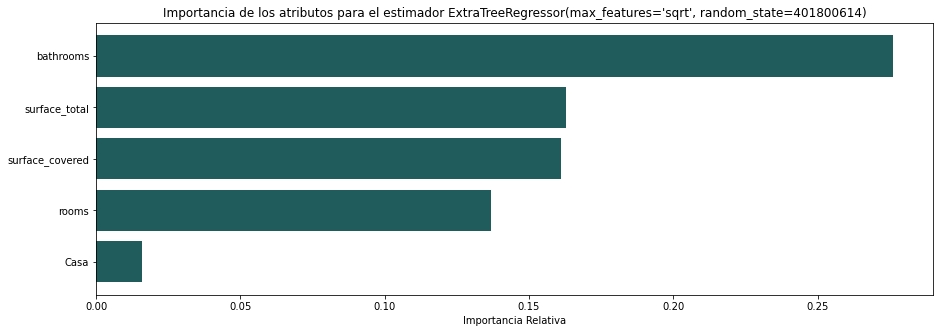

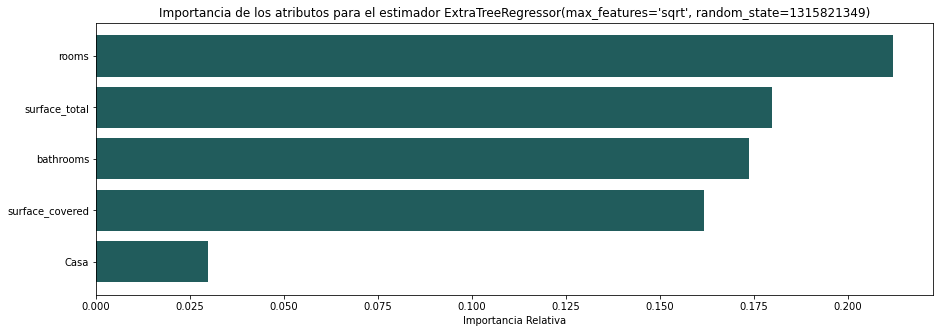

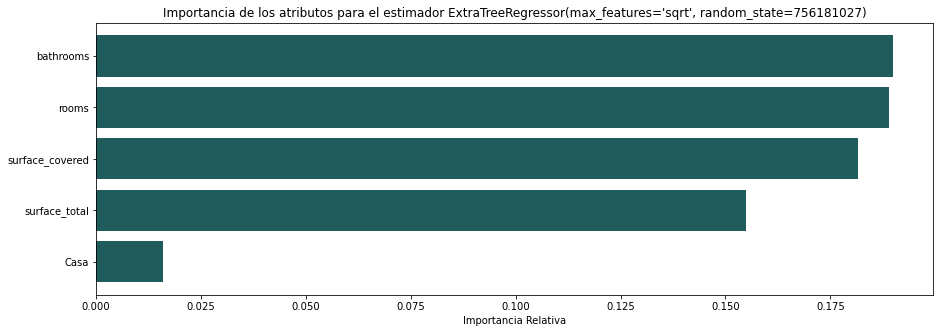

In [80]:
#Graficar cinco estimadores elegidos al azar e indentificar aquellos atributos con más importancia.

#Seleccionar cinco estimadores al azar

estimadores = modelo.estimators_

est_a = np.random.choice(estimadores, size=5, replace=False)

# Con la lista depurada, se grafica cada estimador

for est in est_a:
    importances = est.feature_importances_[:5]
    indices = np.argsort(importances)
    plt.figure(figsize=(15,5))
    plt.title('Importancia de los atributos para el estimador '+ str(est))
    plt.barh(range(len(indices)), importances[indices], color="#215c5c", align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Importancia Relativa')
    plt.show()

((array([-4.05058374, -3.83805545, -3.72191223, ...,  3.72191223,
          3.83805545,  4.05058374]),
  array([-431.        , -292.12664045, -287.        , ...,  320.88601748,
          325.47867372,  372.66666667])),
 (37.608995635785455, -0.2638473637504234, 0.9168744581328359))

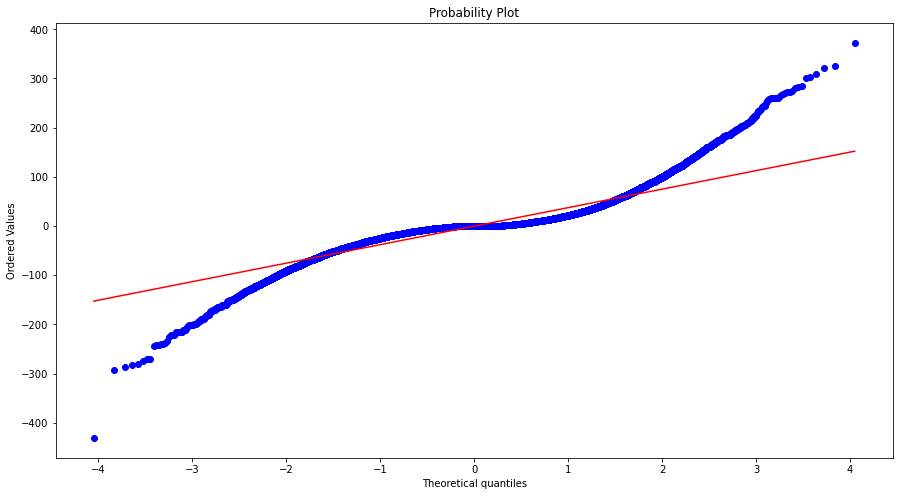

In [81]:
from scipy import stats

#Tomar los valores reales menos los obtenidos del modelo y graficar
error = y_test_a - pred_et 

plt.figure(figsize=(15,8))

stats.probplot(error, dist="norm", plot=plt)



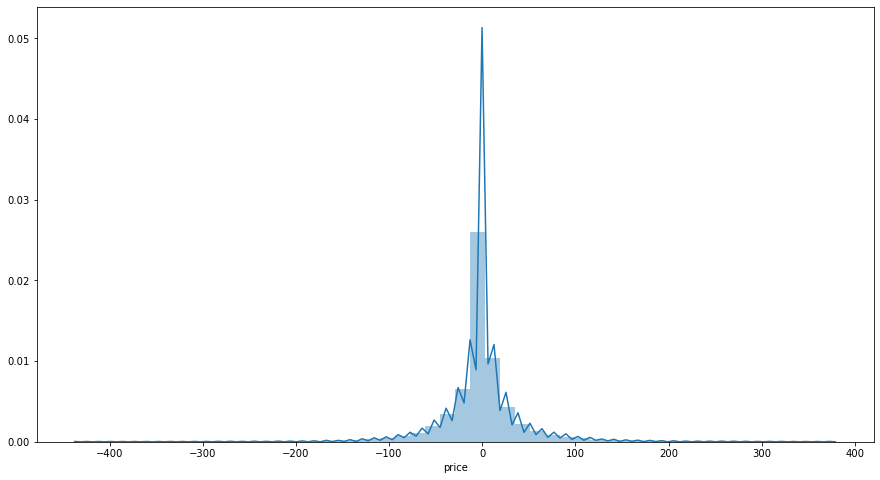

In [82]:
plt.figure(figsize=(15,8))
sns.distplot(error)

Este gráfico también muestra una distribución normal de los errores, lo que se corresponde con una regresión lineal.

**DESAFÍO OPCIONAL**

Aplica una técnica de Clustering sobre el dataset. Puedes combinar con técnicas de reducción de dimensionalidad para facilitar la visualización. ¿Qué clusters encuentras? ¿A qué pueden corresponder? Te dejamos preguntas que pueden servir como disparadoras: ¿qué barrios se parecen más entre sí?¿qué tipos de propiedades se parecen más entre sí?

In [24]:
from shapely.geometry import Point #para calcular dónde debe ir el nombre

data = pd.read_csv('D:/DS4A/Acamica/DS Acamica/wk-01/DS_Proyecto_01_Datos_Properati.csv') #vuelvo a cargar los datos

data = data[(data.l2 == "Capital Federal")] #limitar el dataset a Capital Federal

In [25]:
data.head()

start_date    end_date  created_on        lat        lon         l1  \
0  2019-10-17  2019-12-23  2019-10-17 -34.605880 -58.384949  Argentina   
1  2019-10-17  2019-11-21  2019-10-17 -34.624056 -58.412110  Argentina   
2  2019-10-17  2019-11-01  2019-10-17 -34.593569 -58.427474  Argentina   
3  2019-10-17  2019-12-23  2019-10-17 -34.581294 -58.436754  Argentina   
5  2019-10-17  2019-11-01  2019-10-17 -34.593779 -58.441239  Argentina   

                l2             l3  rooms  bedrooms  bathrooms  surface_total  \
0  Capital Federal  San Cristobal    7.0       7.0        2.0          140.0   
1  Capital Federal          Boedo    2.0       1.0        2.0           70.0   
2  Capital Federal        Palermo    2.0       1.0        1.0           45.0   
3  Capital Federal        Palermo    2.0       1.0        1.0           85.0   
5  Capital Federal   Villa Crespo    2.0       1.0        1.0           56.0   

   surface_covered     price currency  \
0            140.0  153000.0      USD   
1             58.0  159000.0      USD   
2             45.0  125000.0      USD   
3             50.0  295000.0      USD   
5             56.0  150000.0      USD   

                                               title  \
0        ***Venta semipiso centro, ideal hostel*****   
1   Espectacular PH reciclado en Boedo sin expensas.   
2  Depto.tipo casa de 2 ambientes en Venta en Pal...   
3  COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...   
5  Depto.tipo casa de 2 ambientes en Venta en Vil...   

                                         description property_type  \
0  DESCRIPCION DE LA PROPIEDAD: Departamento de 1...  Departamento   
1   PH reciclado en Boedo a una cuadra de la plaz...            PH   
2  2 ambienets amplio , excelente estado , patio ...            PH   
3  HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...            PH   
5  Excelente ph solo 2 unidades, no paga expensas...            PH   

  operation_type  
0          Venta  
1          Venta  
2          Venta  
3          Venta  
5          Venta

In [27]:
#Limitar el dataset a las propiedades que estén dentro del rango intercuartílico de precio
q1, q3 = data['price'].quantile(0.25), data['price'].quantile(0.75)
IQR = q3 - q1

upper = q3 + 1.5 * IQR
lower = q1 - 1.5 * IQR 

data_r = data[(data.price > lower) & (data.price < upper)]

In [28]:
#Imputar valores faltantes en bathrooms según tipo de propiedad
data_r["bathrooms"] = data_r.groupby("property_type")["bathrooms"].transform(
    lambda grp: grp.fillna(np.mean(grp)))

#Imputar valores faltantes en surface_total según tipo de propiedad
data_r["surface_total"] = data_r.groupby("property_type")["surface_total"].transform(
    lambda grp: grp.fillna(np.mean(grp)))

#Imputar valores faltantes en surface_covered según tipo de propiedad
data_r["surface_covered"] = data_r.groupby("property_type")["surface_covered"].transform(
    lambda grp: grp.fillna(np.mean(grp)))

data_r.isna().sum()

C:\Users\alexander.valencia\AppData\Local\Temp\ipykernel_18820\2963557315.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_r["bathrooms"] = data_r.groupby("property_type")["bathrooms"].transform(
C:\Users\alexander.valencia\AppData\Local\Temp\ipykernel_18820\2963557315.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_r["surface_total"] = data_r.groupby("property_type")["surface_total"].transform(
C:\Users\alexander.valencia\AppData\Local\Temp\ipykernel_18820\2963557315.py:10: SettingWithCopy

start_date            0
end_date              0
created_on            0
lat                3721
lon                3735
l1                    0
l2                    0
l3                    0
rooms                 0
bedrooms              0
bathrooms             0
surface_total         0
surface_covered       0
price                 0
currency              0
title                 0
description           0
property_type         0
operation_type        0
dtype: int64

In [29]:
#Eliminar propiedades que no tengan coordenadas geo-referenciadas: lat y lon para graficar:

data_r.dropna(inplace = True)

C:\Users\alexander.valencia\AppData\Local\Temp\ipykernel_18820\643891004.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_r.dropna(inplace = True)


In [30]:
c_drop = ['start_date', 'end_date', 'created_on','l1', 'l2','currency', 'title', 'description','operation_type' ]

data_r.drop(c_drop, axis = 1, inplace = True) #eliminr las columnas no necesarias

C:\Users\alexander.valencia\AppData\Local\Temp\ipykernel_18820\495066057.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_r.drop(c_drop, axis = 1, inplace = True) #elimino las columnas que no necesito


In [31]:
data_r.head()

lat        lon             l3  rooms  bedrooms  bathrooms  \
0 -34.605880 -58.384949  San Cristobal    7.0       7.0        2.0   
1 -34.624056 -58.412110          Boedo    2.0       1.0        2.0   
2 -34.593569 -58.427474        Palermo    2.0       1.0        1.0   
3 -34.581294 -58.436754        Palermo    2.0       1.0        1.0   
5 -34.593779 -58.441239   Villa Crespo    2.0       1.0        1.0   

   surface_total  surface_covered     price property_type  
0          140.0            140.0  153000.0  Departamento  
1           70.0             58.0  159000.0            PH  
2           45.0             45.0  125000.0            PH  
3           85.0             50.0  295000.0            PH  
5           56.0             56.0  150000.0            PH

In [32]:
#Label encoding por tipo de propiedad
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data_r["tipo"] = encoder.fit_transform(data_r["property_type"])


C:\Users\alexander.valencia\AppData\Local\Temp\ipykernel_18820\1096476176.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_r["tipo"] = encoder.fit_transform(data_r["property_type"])


In [33]:
r = data_r["surface_covered"] > data_r["surface_total"]
r.sum()

1105

In [34]:
data_r.loc[data_r["surface_covered"] > data_r["surface_total"], "surface_covered"] = data_r["surface_total"]

In [35]:
r = data_r["surface_covered"] > data_r["surface_total"]
r.sum()

0

In [36]:
#Label encoding por barrio
data_r["barrio"] = encoder.fit_transform(data_r["l3"])
data_r.head()

C:\Users\alexander.valencia\AppData\Local\Temp\ipykernel_18820\3384794964.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_r["barrio"] = encoder.fit_transform(data_r["l3"])


lat        lon             l3  rooms  bedrooms  bathrooms  \
0 -34.605880 -58.384949  San Cristobal    7.0       7.0        2.0   
1 -34.624056 -58.412110          Boedo    2.0       1.0        2.0   
2 -34.593569 -58.427474        Palermo    2.0       1.0        1.0   
3 -34.581294 -58.436754        Palermo    2.0       1.0        1.0   
5 -34.593779 -58.441239   Villa Crespo    2.0       1.0        1.0   

   surface_total  surface_covered     price property_type  tipo  barrio  
0          140.0            140.0  153000.0  Departamento     3      38  
1           70.0             58.0  159000.0            PH     9       8  
2           45.0             45.0  125000.0            PH     9      26  
3           85.0             50.0  295000.0            PH     9      26  
5           56.0             56.0  150000.0            PH     9      44

In [37]:
#Generar el set de datos a utilizar, con los atributos más importantes:

columnas = ["rooms","bathrooms", "surface_total", "surface_covered", "price", "tipo", "barrio"]

X = data_r[columnas]

X.head()

rooms  bathrooms  surface_total  surface_covered     price  tipo  barrio
0    7.0        2.0          140.0            140.0  153000.0     3      38
1    2.0        2.0           70.0             58.0  159000.0     9       8
2    2.0        1.0           45.0             45.0  125000.0     9      26
3    2.0        1.0           85.0             50.0  295000.0     9      26
5    2.0        1.0           56.0             56.0  150000.0     9      44

In [38]:
#Escalar los datos y preparar para buscar la cantidad de K-means
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cluster = scaler.fit_transform(X) 

In [39]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [40]:
# Generar un gráfico de codo para ver qué cantidad de clusters buscar

# Preparar una lista para almacenar las distancias medias
lista_distancias_medias = []

# Entrenar un modelo para cada numero de cluster que se pretende evaluar
K = np.arange(2,20)

for k in K:
    # Definir y entrenar el modelo
    km = KMeans(n_clusters=k)
    km = km.fit(cluster)
    # Tomar la suma de las distancias para todas las instancias del dataset
    distancia_total = km.inertia_
    # Calcular la distancia media y agregar a la lista
    distancia_media = np.divide(distancia_total,cluster.shape[0])
    lista_distancias_medias.append(distancia_media)

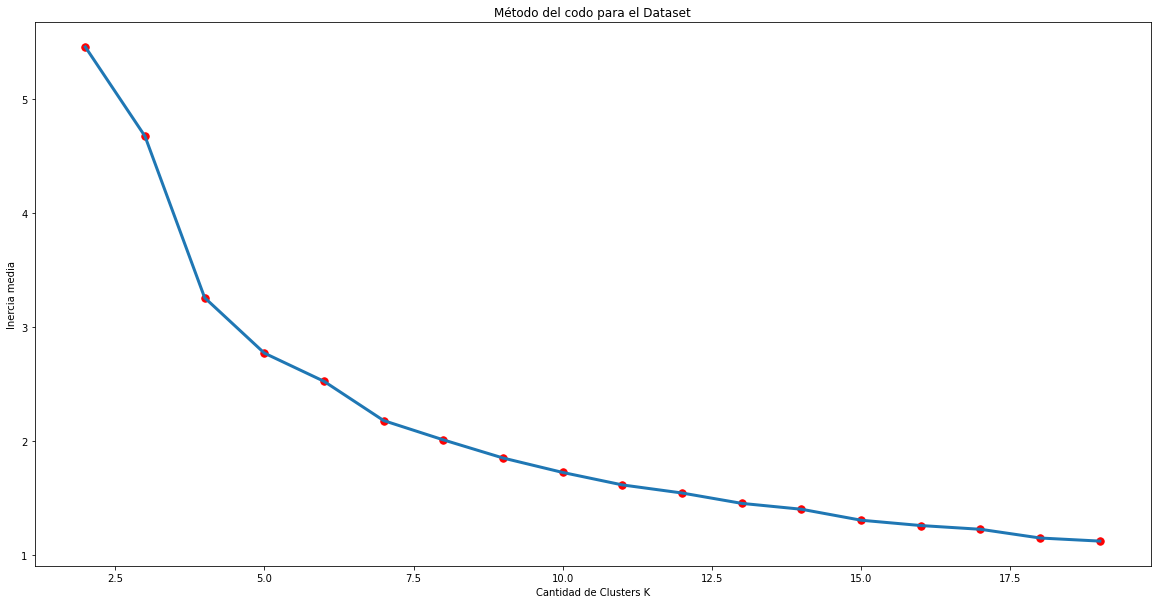

In [41]:
#Graficamr
plt.figure(figsize = (20,10))

# Graficar una linea continua y tambien unos puntos para resaltar los valores enteros de K.
plt.plot(K,lista_distancias_medias, lw=3)
plt.scatter(K,lista_distancias_medias,s=55,c='r')
plt.xlabel('Cantidad de Clusters K')
plt.ylabel('Inercia media')
plt.title('Método del codo para el Dataset')

plt.show()

In [42]:
# Definir y entrenar el modelo
km = KMeans(n_clusters=6)
km = km.fit(cluster)
# Obtener la posición de los centros y las etiquetas
etiquetas = km.labels_
centros = km.cluster_centers_

In [43]:
import geopandas as gpd

#Para trazar un mapa de la ciudad, primero es necesario cargar los datos geográficos por barrio
#Esta información la provee el Gobierno de la Ciudad en formato shp

fp = "D:/DS4A/Acamica/DS Acamica/wk-01/Shps/barrios_badata.shp"
map_df = gpd.read_file(fp)
map_df.head()

BARRIO  COMUNA    PERIMETRO          AREA  OBJETO  \
0         CHACARITA    15.0  7724.852955  3.115707e+06  BARRIO   
1          PATERNAL    15.0  7087.513295  2.229829e+06  BARRIO   
2      VILLA CRESPO    15.0  8131.857075  3.615978e+06  BARRIO   
3  VILLA DEL PARQUE    11.0  7705.389797  3.399596e+06  BARRIO   
4           ALMAGRO     5.0  8537.901368  4.050752e+06  BARRIO   

                                            geometry  
0  POLYGON ((100961.338 103691.974, 100884.721 10...  
1  POLYGON ((99791.104 103628.888, 99787.132 1036...  
2  POLYGON ((103627.714 103487.358, 103517.533 10...  
3  POLYGON ((97128.440 101597.513, 97112.315 1015...  
4  POLYGON ((104625.143 101679.935, 104629.994 10...

In [44]:
from shapely.geometry import Point, Polygon

In [45]:
#Es necesario cambiar la forma en que se proyecta el mapa para que coincida con los datos del modelo
crs = "+proj=longlat +datum=WGS84 +no_defs"
map_df = map_df.to_crs(crs=crs)

In [46]:
crs = {'init' :'epsg:4326'} #para el nuevo set de datos

In [47]:
#generar una lista con los puntos de latitud y longitud

geometry = [Point(xy) for xy in zip(data_r["lon"],data_r["lat"])] 

In [48]:
#Obtener un nuevo dataset con características de geopandas
geo_df = gpd.GeoDataFrame(data_r,
                         crs = crs,
                         geometry = geometry)
geo_df.head()

C:\Users\alexander.valencia\Anaconda3\envs\geo_env\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


lat        lon             l3  rooms  bedrooms  bathrooms  \
0 -34.605880 -58.384949  San Cristobal    7.0       7.0        2.0   
1 -34.624056 -58.412110          Boedo    2.0       1.0        2.0   
2 -34.593569 -58.427474        Palermo    2.0       1.0        1.0   
3 -34.581294 -58.436754        Palermo    2.0       1.0        1.0   
5 -34.593779 -58.441239   Villa Crespo    2.0       1.0        1.0   

   surface_total  surface_covered     price property_type  tipo  barrio  \
0          140.0            140.0  153000.0  Departamento     3      38   
1           70.0             58.0  159000.0            PH     9       8   
2           45.0             45.0  125000.0            PH     9      26   
3           85.0             50.0  295000.0            PH     9      26   
5           56.0             56.0  150000.0            PH     9      44   

                      geometry  
0  POINT (-58.38495 -34.60588)  
1  POINT (-58.41211 -34.62406)  
2  POINT (-58.42747 -34.59357)  
3  POINT (-58.43675 -34.58129)  
5  POINT (-58.44124 -34.59378)

In [49]:
#A este nuevo dataset se le suman las etiquetas obtenidas con KMeans
geo_df["clusters"] = etiquetas

In [50]:
#Generar un nuevo dataset para imprimir los nombres de los barrios
map_df["center"] = map_df["geometry"].centroid
map_df_points = map_df.copy()
map_df_points.set_geometry("center", inplace = True)
texts = []

C:\Users\alexander.valencia\AppData\Local\Temp\ipykernel_18820\2863782649.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  map_df["center"] = map_df["geometry"].centroid


C:\Users\alexander.valencia\Anaconda3\envs\geo_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


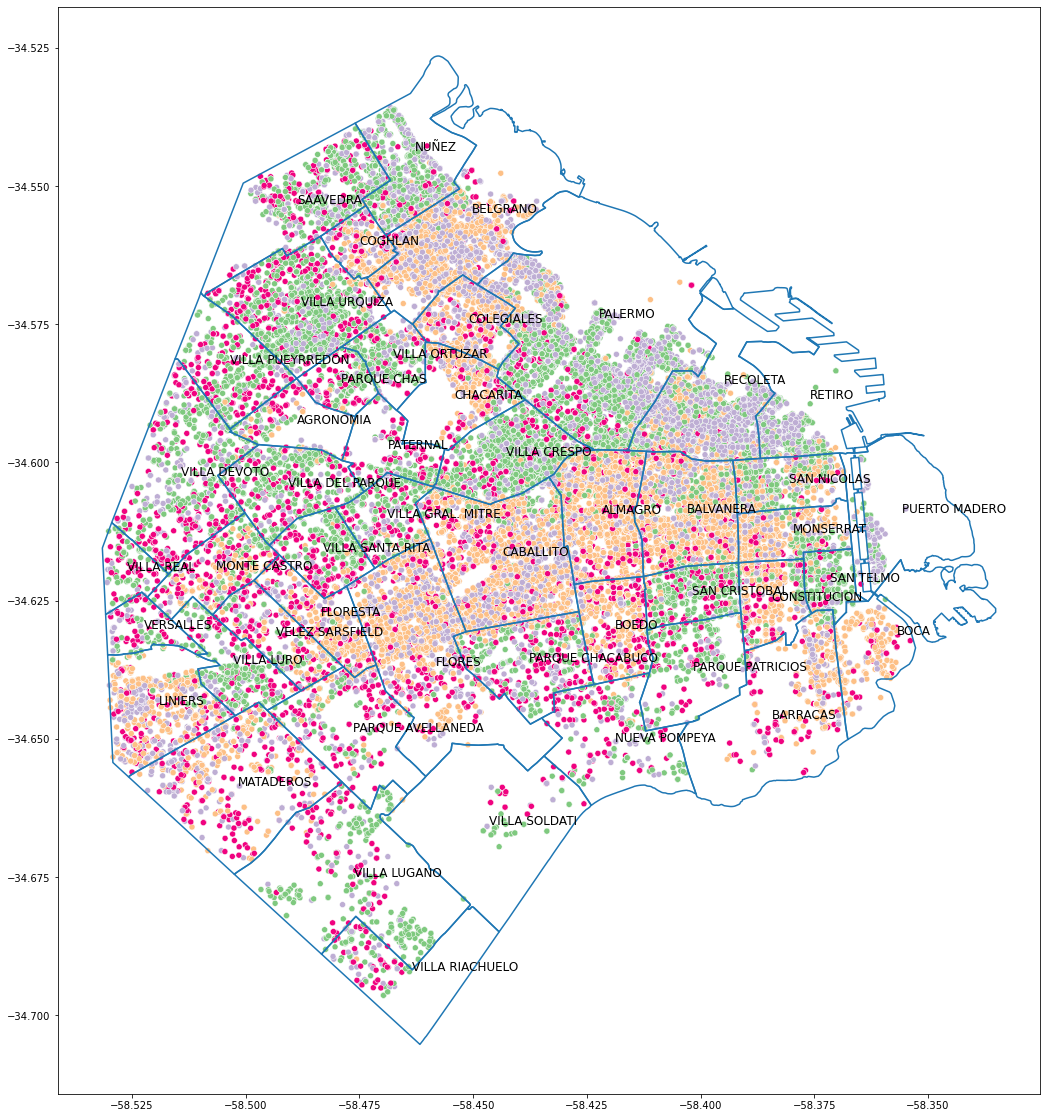

In [51]:
#Rutina para generar el mapa

fig, ax = plt.subplots(1, figsize=(20, 20))
map_df.boundary.plot(ax = ax)
sns.scatterplot(geo_df.geometry.x, geo_df.geometry.y, hue = geo_df.clusters.to_list(), ax = ax, 
                legend = False, palette = "Accent")
for x, y, label in zip(map_df_points.geometry.x, map_df_points.geometry.y, map_df_points.BARRIO):
    texts.append(plt.text(x, y, label, fontsize = 12))

## Conclusiones sobre los algoritmos utilizados

## Conclusiones generales